In [1]:
import numpy as np
import pandas as pd
import math

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option("display.max_columns", None)
plt.style.use('seaborn-v0_8')
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["axes.titleweight"] = 'bold'
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["legend.title_fontsize"] = 15

In [3]:
dataset = pd.read_csv(r"C:/Users/User/Downloads/day.csv", encoding= 'unicode_escape')


## Data Inspection

In [4]:
print(f' The shape of dataset is {(dataset.shape)} \n Total Rows are : {(dataset.shape)[0]}\n Total Columns are : {(dataset.shape)[1]}')

 The shape of dataset is (731, 16) 
 Total Rows are : 731
 Total Columns are : 16


In [5]:
dataset.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
dataset.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [8]:
dataset.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
dataset.describe(include = 'all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


## Observations

In [10]:
dataset.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [11]:
dataset['dteday'] = dataset['dteday'].astype('datetime64[ns]')

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [13]:
dataset['Month'] = dataset['dteday'].dt.month

dataset['Day'] = dataset['dteday'].dt.day_name()    

In [14]:
dataset['Weekdays_or_weekend'] = dataset['dteday'].apply(lambda x: 1 if x=='Saturday' or x=='Sunday' else 0)

In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   instant              731 non-null    int64         
 1   dteday               731 non-null    datetime64[ns]
 2   season               731 non-null    int64         
 3   yr                   731 non-null    int64         
 4   mnth                 731 non-null    int64         
 5   holiday              731 non-null    int64         
 6   weekday              731 non-null    int64         
 7   workingday           731 non-null    int64         
 8   weathersit           731 non-null    int64         
 9   temp                 731 non-null    float64       
 10  atemp                731 non-null    float64       
 11  hum                  731 non-null    float64       
 12  windspeed            731 non-null    float64       
 13  casual               731 non-null  

In [16]:
dataset.head(2)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Month,Day,Weekdays_or_weekend
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,1,Saturday,0
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,1,Sunday,0


In [17]:
dataset.drop(['dteday',"Day",'instant', 'casual', 'registered','temp','mnth'],axis=1 ,inplace=True)

In [18]:
dataset.head(2)

,season,yr,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,Month,Weekdays_or_weekend
0,1,0,0,6,0,2,0.363625,0.805833,0.160446,985,1,0
1,1,0,0,0,0,2,0.353739,0.696087,0.248539,801,1,0


In [19]:
dataset['season'].value_counts()

season
3    188
2    184
1    181
4    178
Name: count, dtype: int64

In [20]:
dataset['holiday'].value_counts()

holiday
0    710
1     21
Name: count, dtype: int64

In [21]:
dataset['workingday'].value_counts()

workingday
1    500
0    231
Name: count, dtype: int64

In [22]:
dataset['Month'].value_counts()

Month
1     62
3     62
7     62
5     62
12    62
10    62
8     62
4     60
9     60
6     60
11    60
2     57
Name: count, dtype: int64

In [23]:
dataset['Weekdays_or_weekend'].value_counts()

Weekdays_or_weekend
0    731
Name: count, dtype: int64

In [24]:
dataset.describe()

,season,yr,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,Month,Weekdays_or_weekend
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.0
mean,2.496580,0.500684,0.028728,2.997264,0.683995,1.395349,0.474354,0.627894,0.190486,4504.348837,6.519836,0.0
std,1.110807,0.500342,0.167155,2.004787,0.465233,0.544894,0.162961,0.142429,0.077498,1937.211452,3.451913,0.0
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.079070,0.000000,0.022392,22.000000,1.000000,0.0
25%,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.337842,0.520000,0.134950,3152.000000,4.000000,0.0
50%,3.000000,1.000000,0.000000,3.000000,1.000000,1.000000,0.486733,0.626667,0.180975,4548.000000,7.000000,0.0
75%,3.000000,1.000000,0.000000,5.000000,1.000000,2.000000,0.608602,0.730209,0.233214,5956.000000,10.000000,0.0
max,4.000000,1.000000,1.000000,6.000000,1.000000,3.000000,0.840896,0.972500,0.507463,8714.000000,12.000000,0.0


In [25]:
duplicates = dataset.duplicated().sum()
print(f"We have {duplicates} duplicate rows in our Bike Data.")

We have 0 duplicate rows in our Bike Data.


## Exploratory Data Analysis


In [26]:
numeric_features = dataset.describe().columns
numeric_features

Index(['season', 'yr', 'holiday', 'weekday', 'workingday', 'weathersit',
       'atemp', 'hum', 'windspeed', 'cnt', 'Month', 'Weekdays_or_weekend'],
      dtype='object')

In [27]:
categorical_columns = list(set(dataset.columns) - set(numeric_features))
categorical_columns

[]

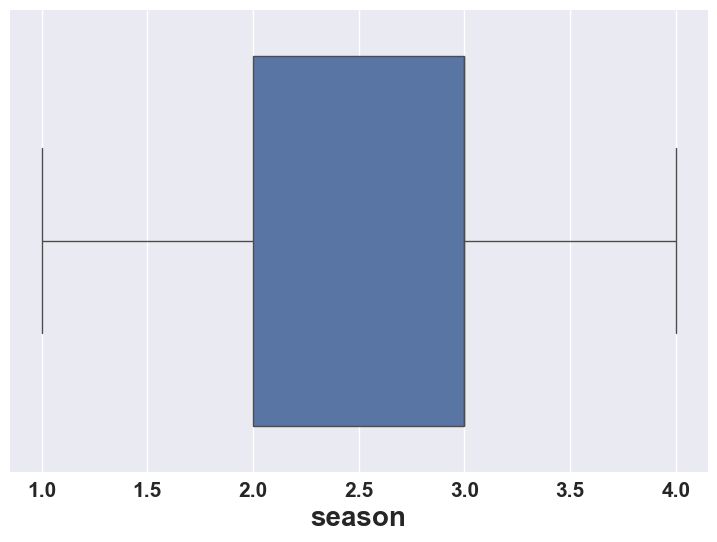

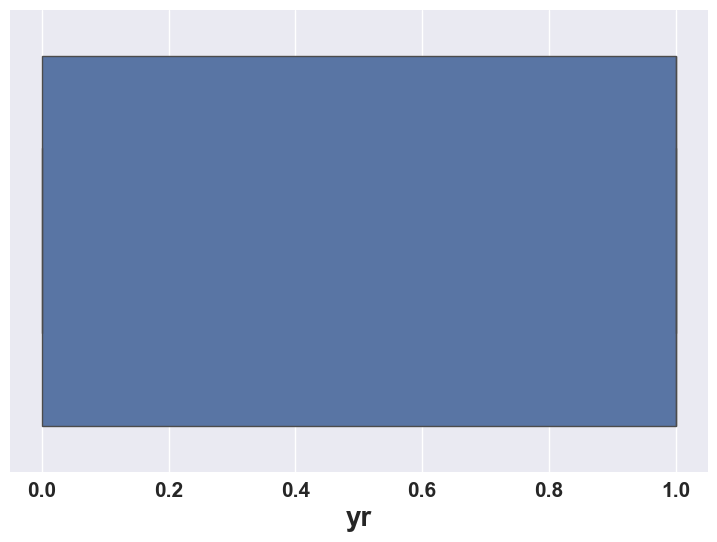

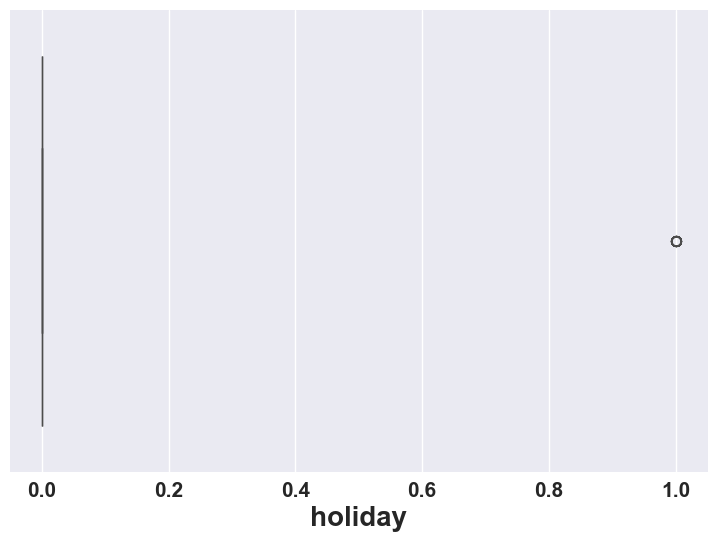

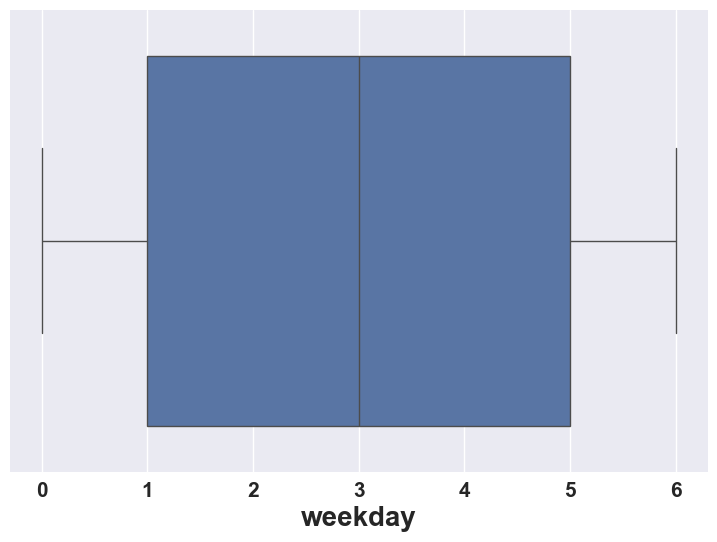

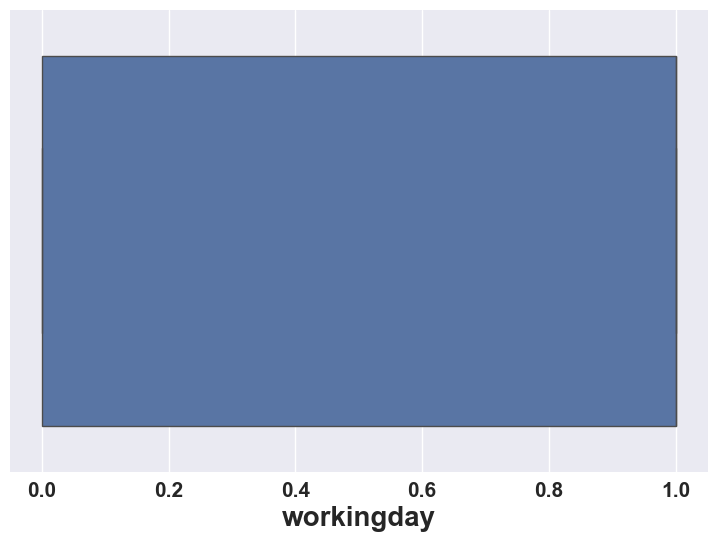

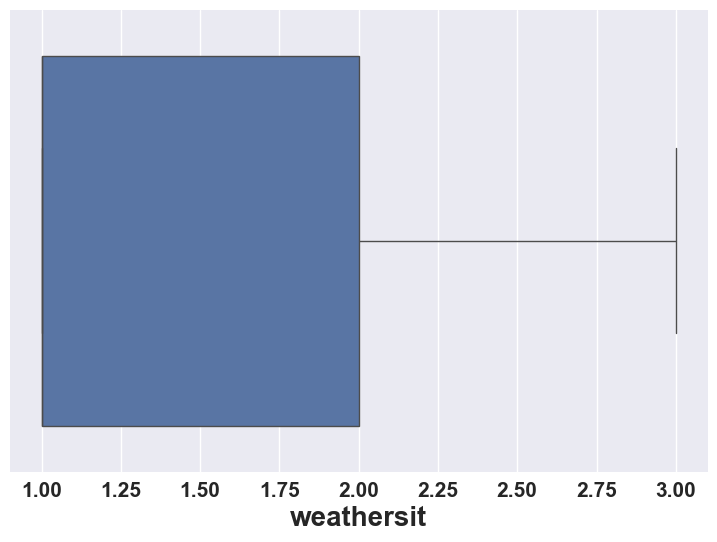

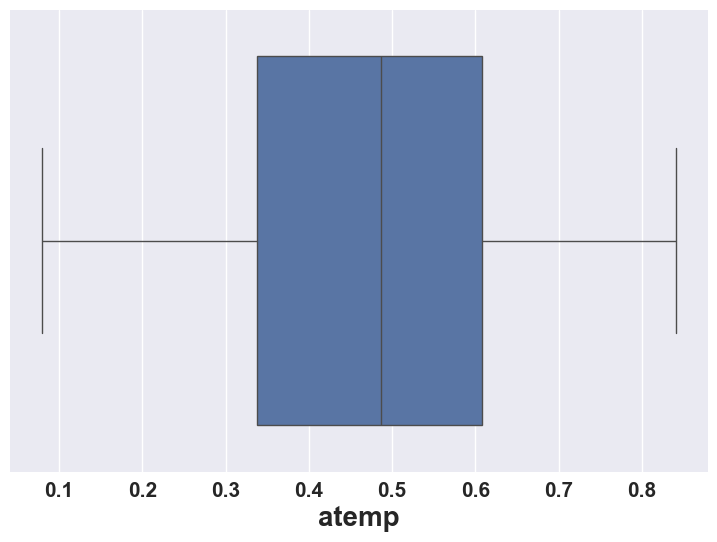

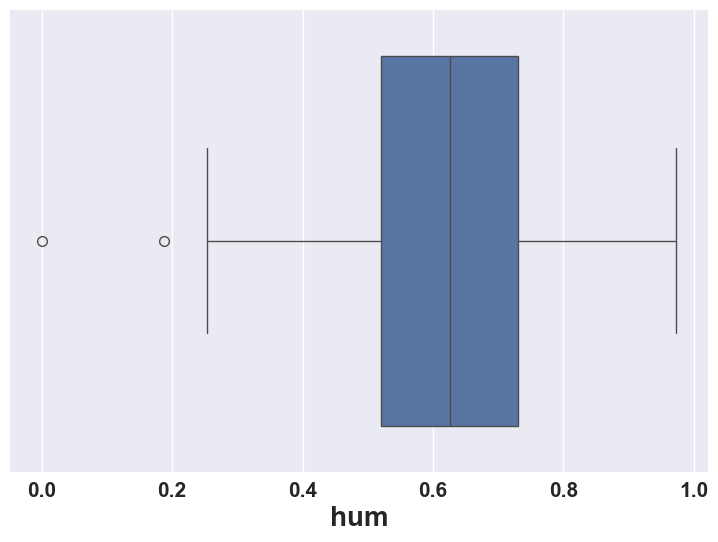

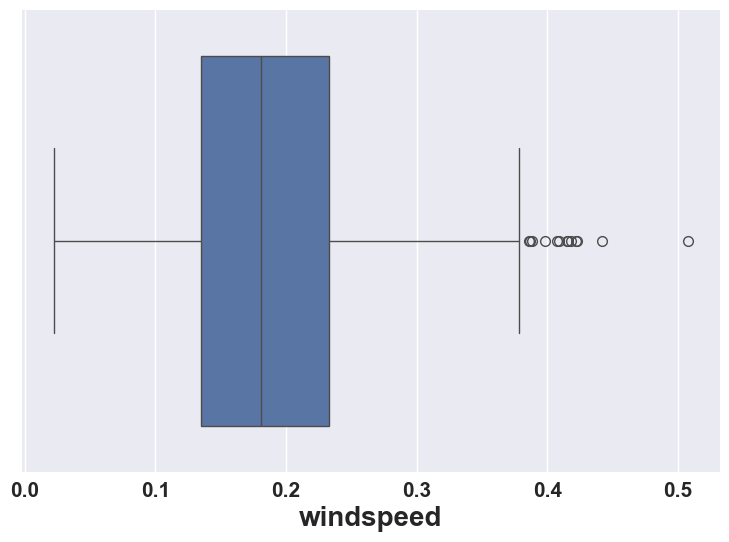

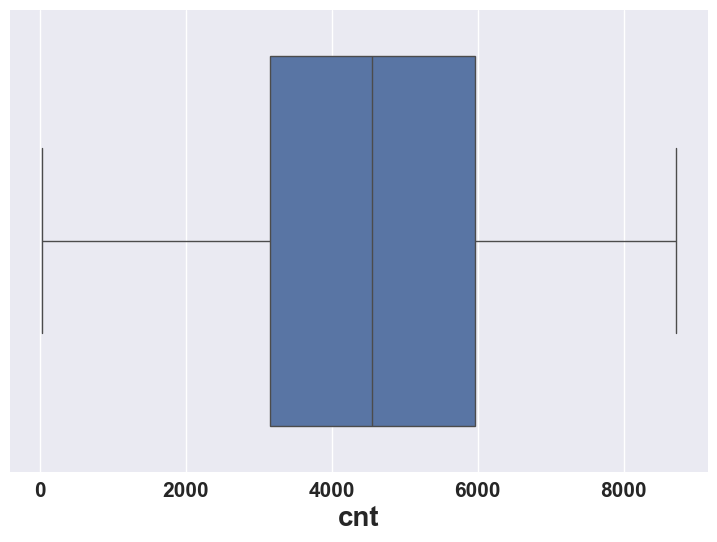

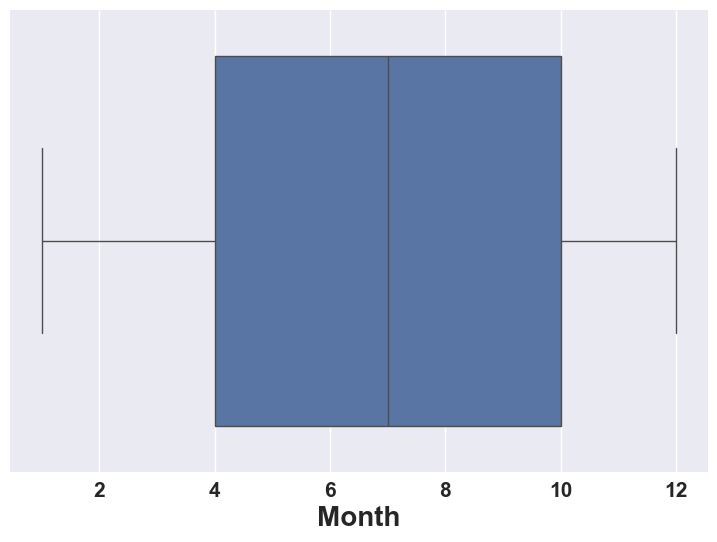

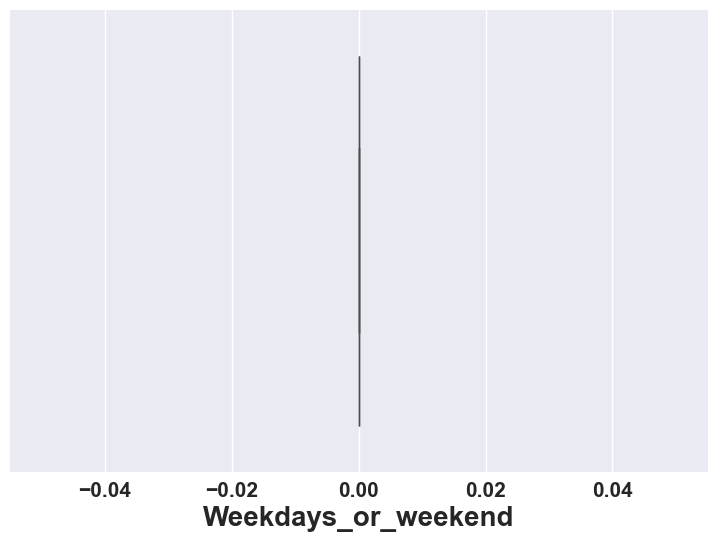

In [28]:
for col in numeric_features:
  fig = plt.figure(figsize = (9,6))
  ax = fig.gca()
  sns.boxplot(x = dataset[col])

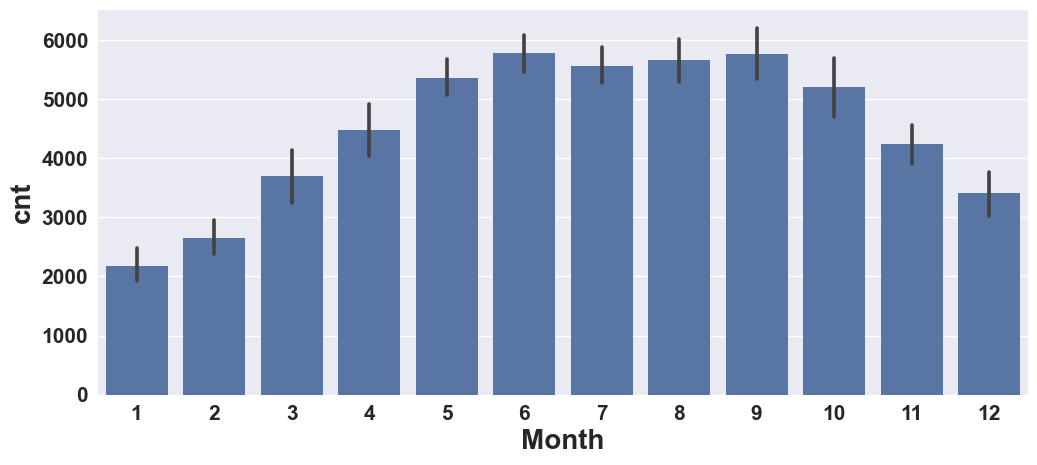

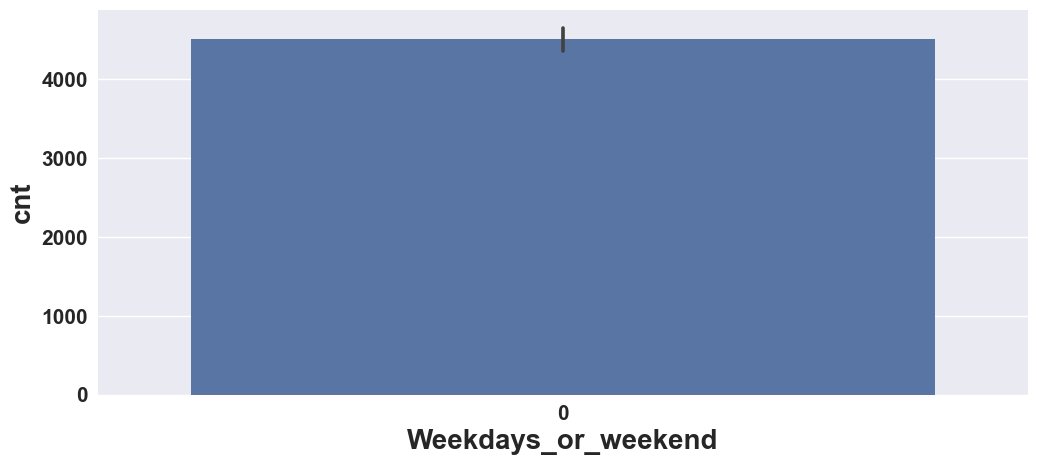

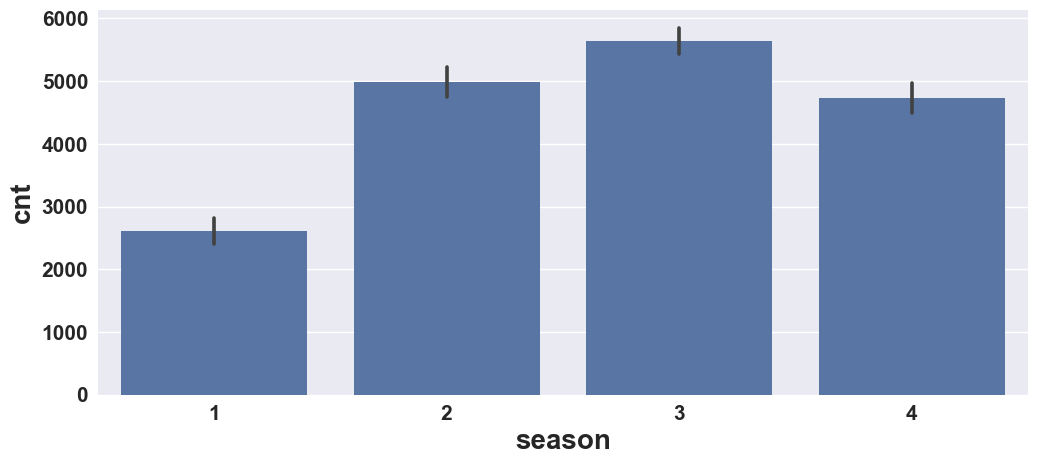

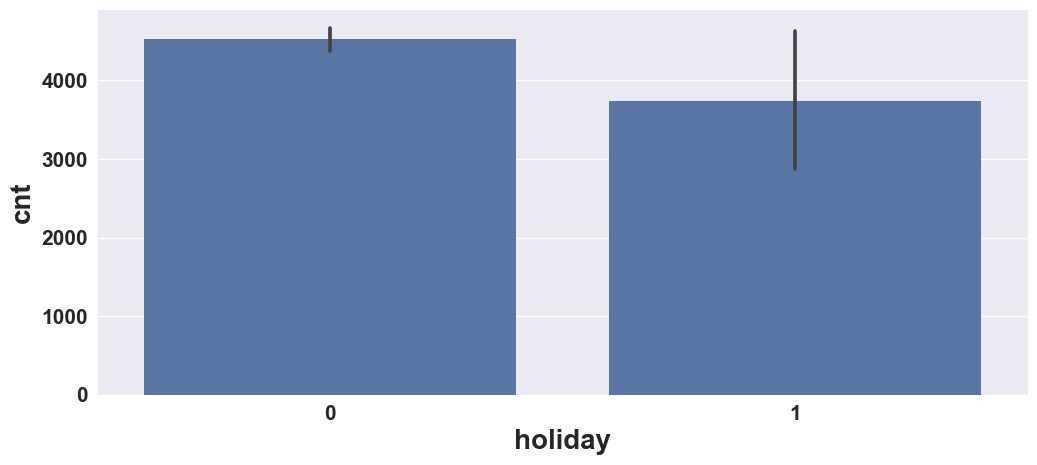

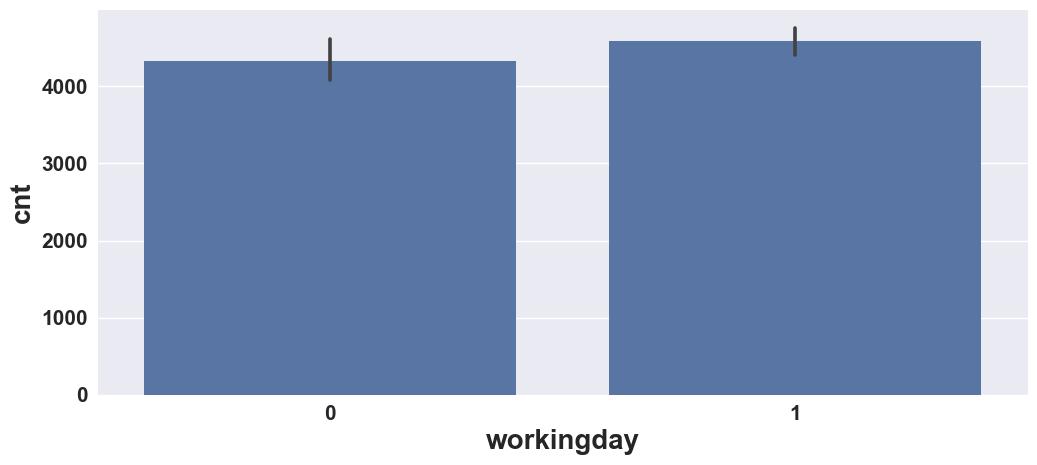

In [29]:
categorical_columns.extend(['Month','Weekdays_or_weekend','season','holiday','workingday'])

for col in categorical_columns:
    fig = plt.figure(figsize=(12, 5))
    ax = fig.gca()
    sns.barplot(x = dataset[col],y = dataset['cnt'])

## Observations from Above Charts -->

## Seasonal Trend:
The Fall season recorded the highest number of bike rentals, indicating that users are most active during this period. In contrast, Spring exhibited the lowest rental activity, suggesting reduced demand during this season.

## Holiday Impact:
A significant increase in bike rentals was observed on holidays, implying that individuals prefer biking for leisure and recreational purposes on non-working days.

## Weekday vs Weekend Usage:
Weekdays showed higher rental counts compared to weekends, suggesting that a large proportion of users utilize bikes primarily for commuting or daily travel purposes.

## Monthly Trend:
The bike rental count began to rise steadily from March and reached its peak in June, highlighting a clear upward trend in demand with the onset of warmer months.

## Dependent Variable (Bike Rent Count) Vs Categorical Columns

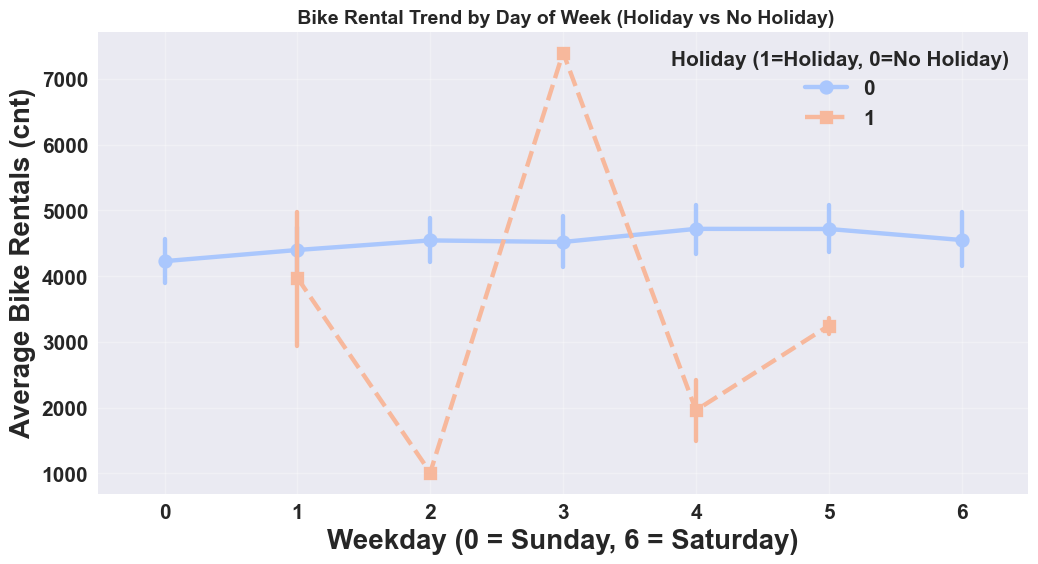

In [30]:
plt.figure(figsize=(12,6))
sns.pointplot(
    data=dataset,
    x="weekday",
    y="cnt",
    hue="holiday",
    palette="coolwarm",
    markers=["o", "s"],
    linestyles=["-", "--"]
)
plt.title(" Bike Rental Trend by Day of Week (Holiday vs No Holiday)", fontsize=14)
plt.xlabel("Weekday (0 = Sunday, 6 = Saturday)")
plt.ylabel("Average Bike Rentals (cnt)")
plt.legend(title="Holiday (1=Holiday, 0=No Holiday)")
plt.grid(True, alpha=0.3)
plt.show()

Text(0.5, 1.0, 'Bike Rental Trend according to day on working day ')

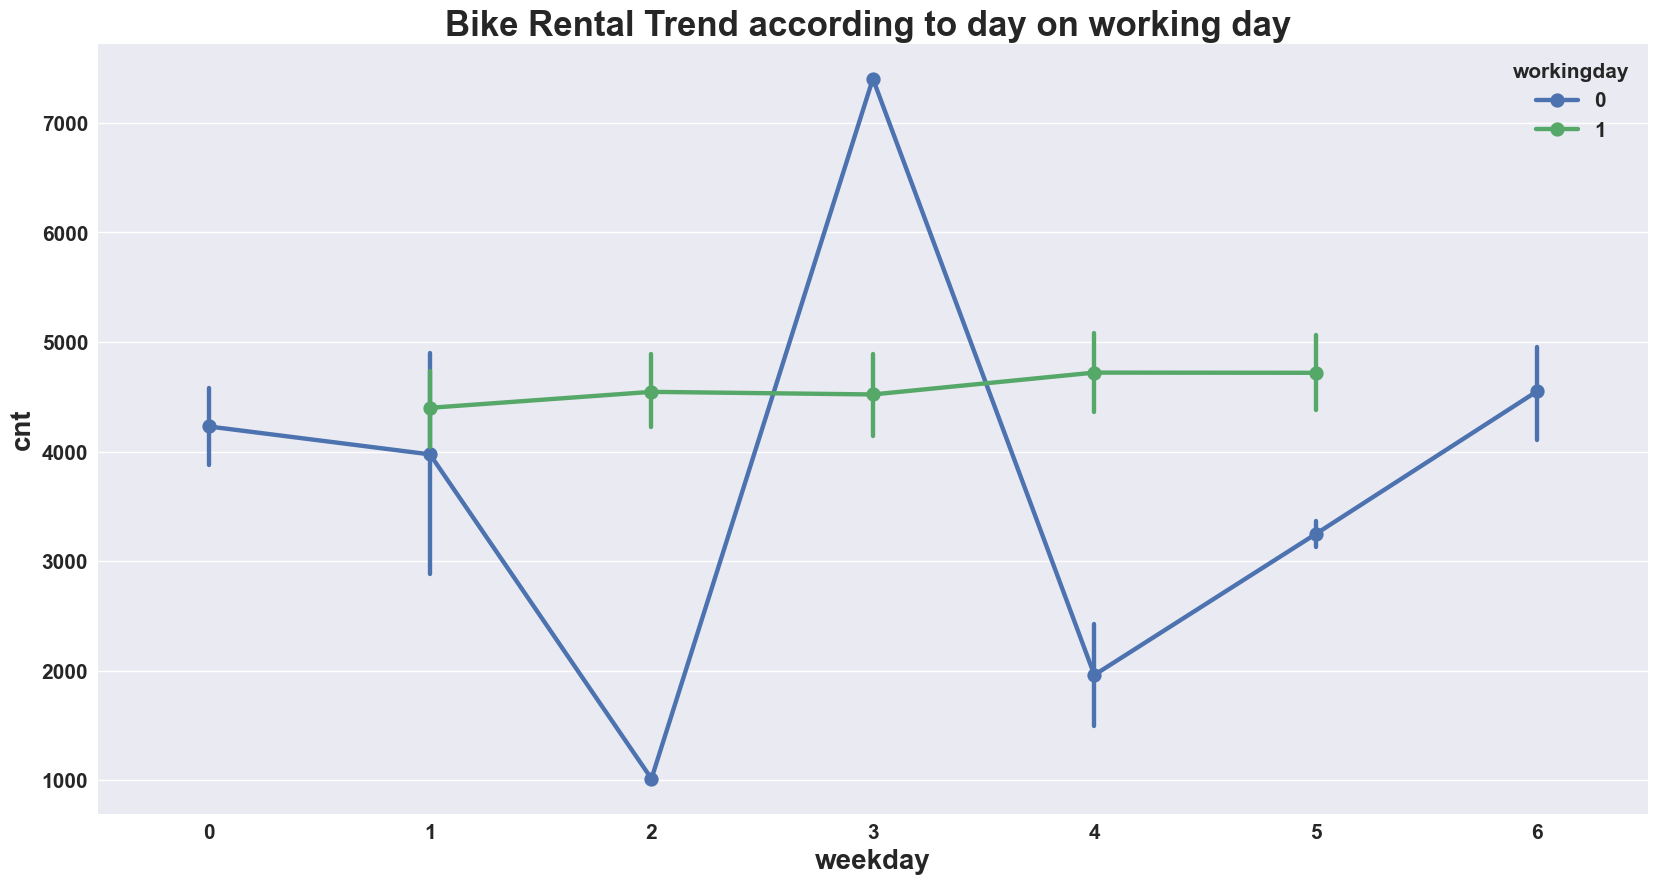

In [31]:
# Bike Rental trend with respect to day on working day.
plt.figure(figsize=(20,10))
sns.pointplot(x = dataset['weekday'],y = dataset['cnt'],hue = dataset['workingday'])
plt.title("Bike Rental Trend according to day on working day ")

Text(0.5, 1.0, 'Bike Rental Trend according to season on month')

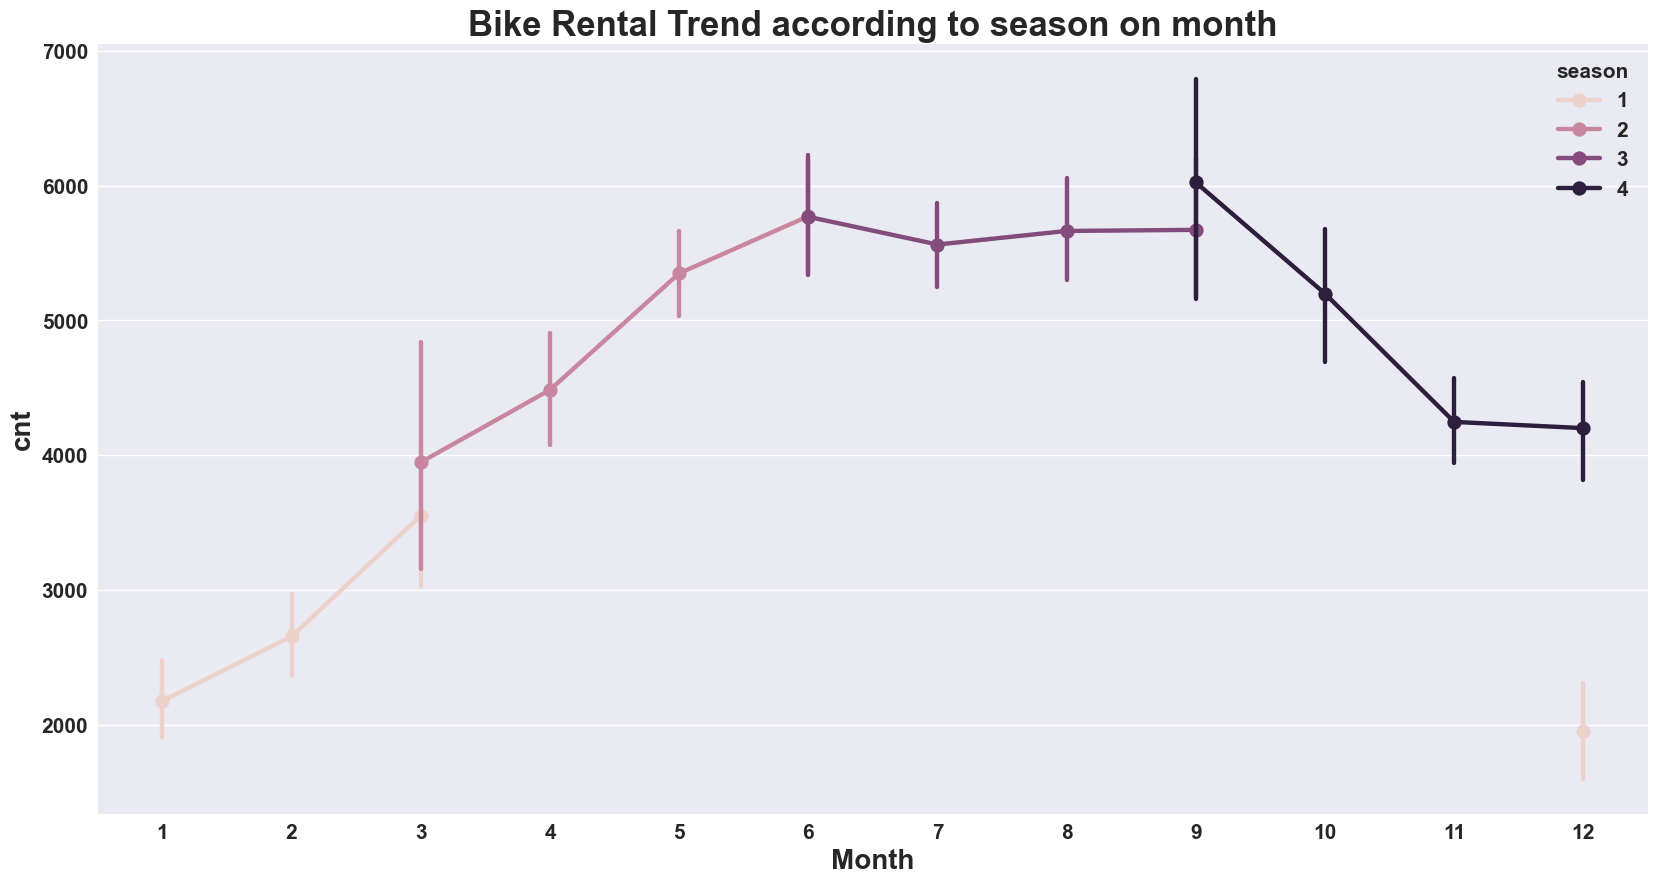

In [32]:
# Bike Rental trend with respect to months on Seasons.
plt.figure(figsize=(20,10))
sns.pointplot(x = dataset['Month'],y = dataset['cnt'],hue = dataset['season'])
plt.title("Bike Rental Trend according to season on month")

Text(0.5, 1.0, 'Bike Rental Trend according to season on weekday')

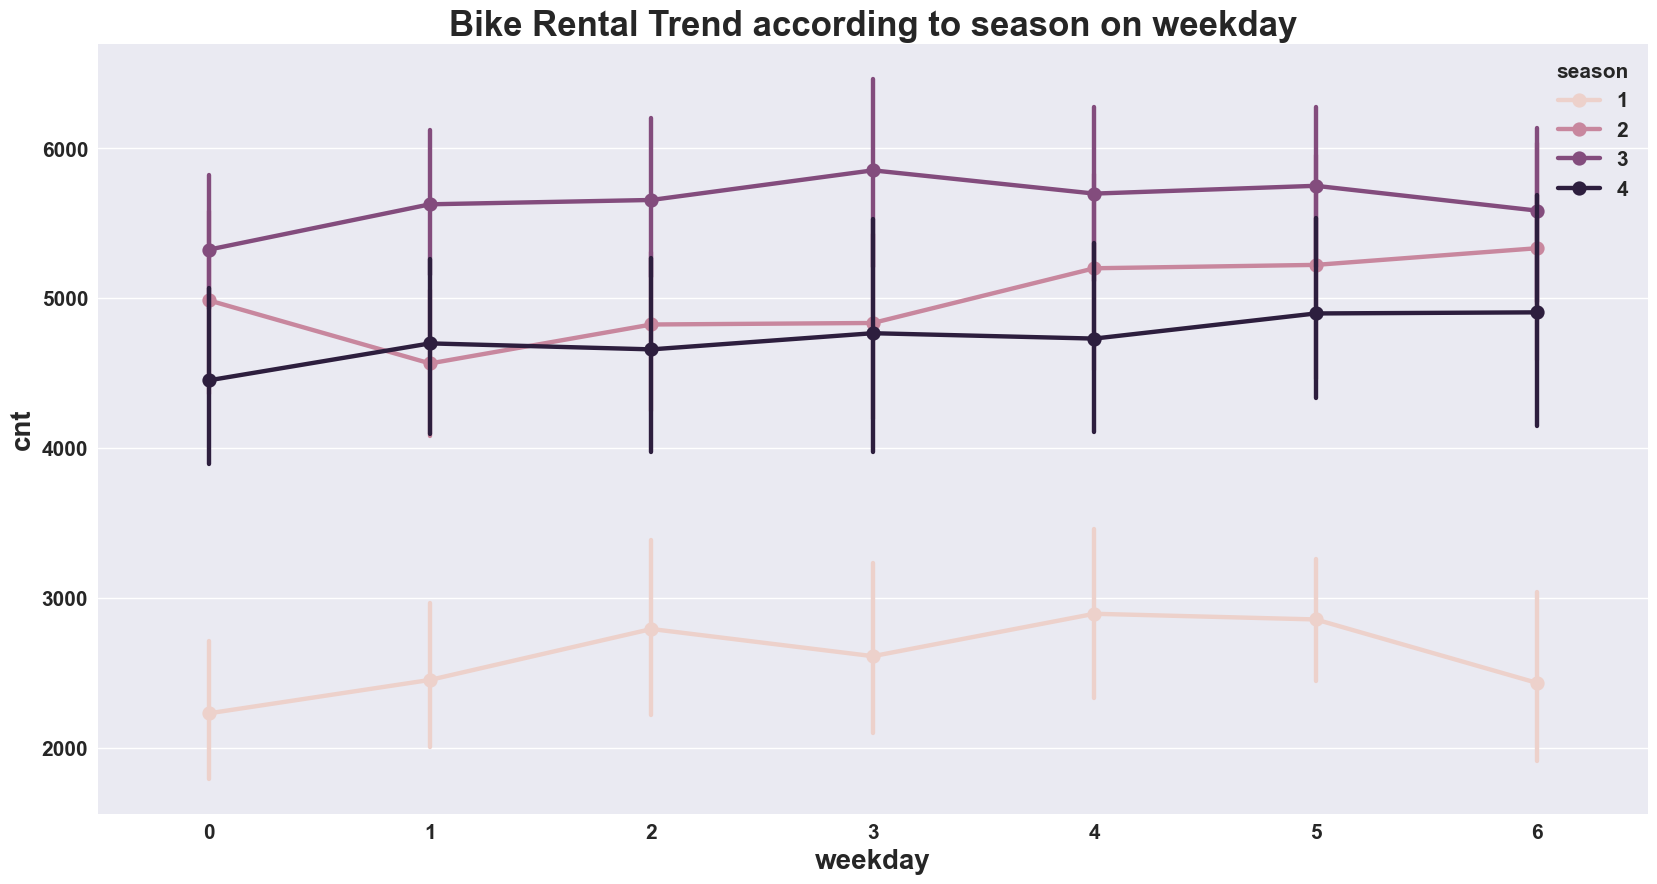

In [33]:
# Bike Rental trend with respect to Hour on Months.
plt.figure(figsize=(20,10))
sns.pointplot(x = dataset['weekday'],y = dataset['cnt'],hue = dataset['season'])
plt.title("Bike Rental Trend according to season on weekday")

### Distribution of Target Variable

<Axes: xlabel='cnt'>

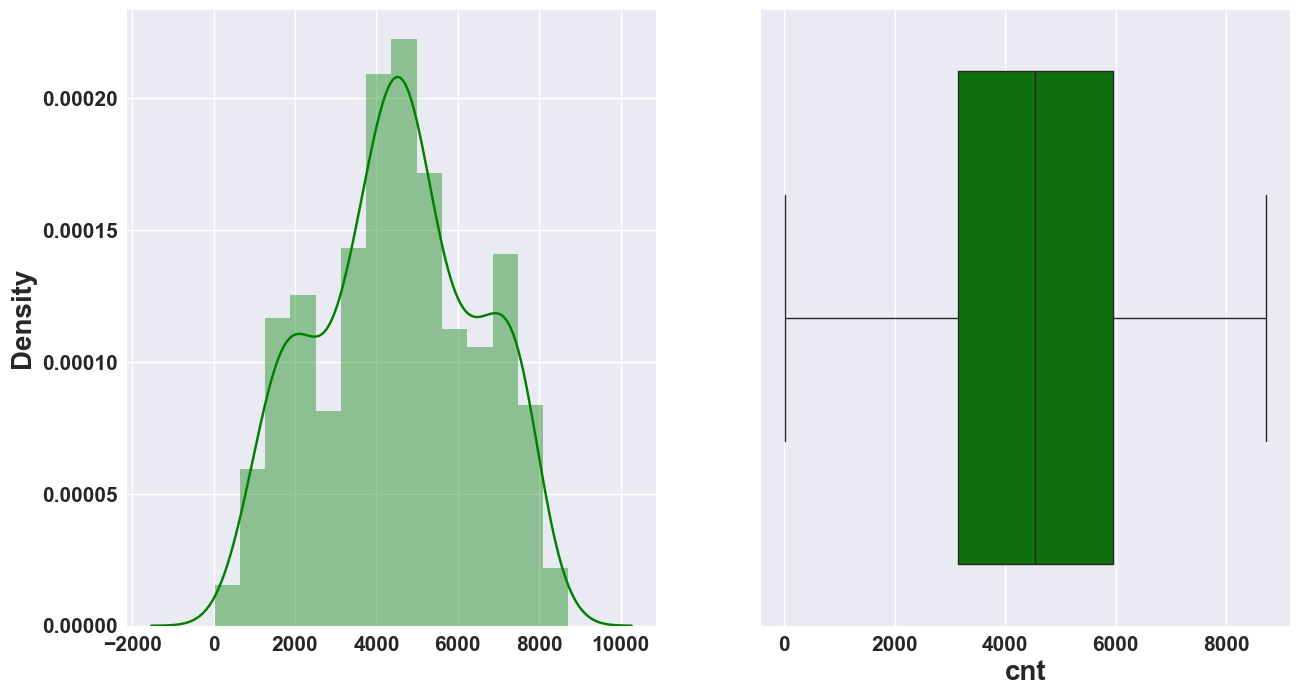

In [34]:
# Distrubution of target varible - "Rented Bike Count"
f, axes = plt.subplots(1, 2,figsize=(15,8))
sns.distplot(x= dataset['cnt'],color='g',ax=axes[0])
sns.boxplot(x = dataset['cnt'],color='g',ax=axes[1])

### Univariate Analysis

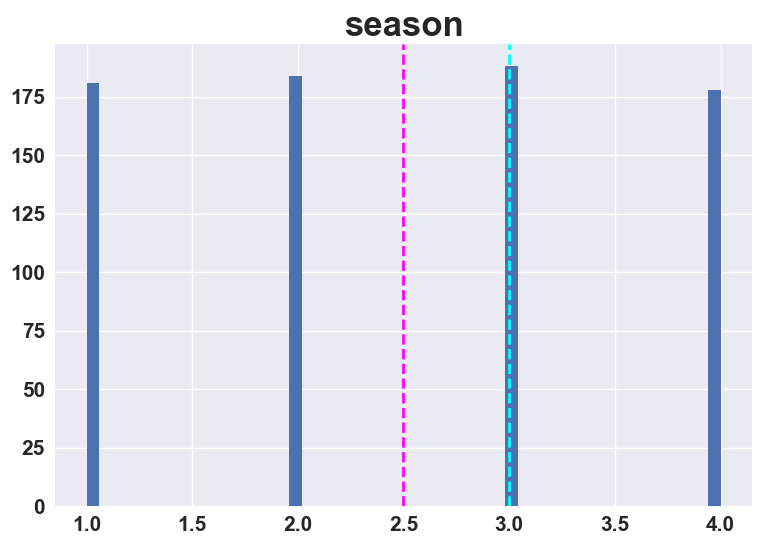

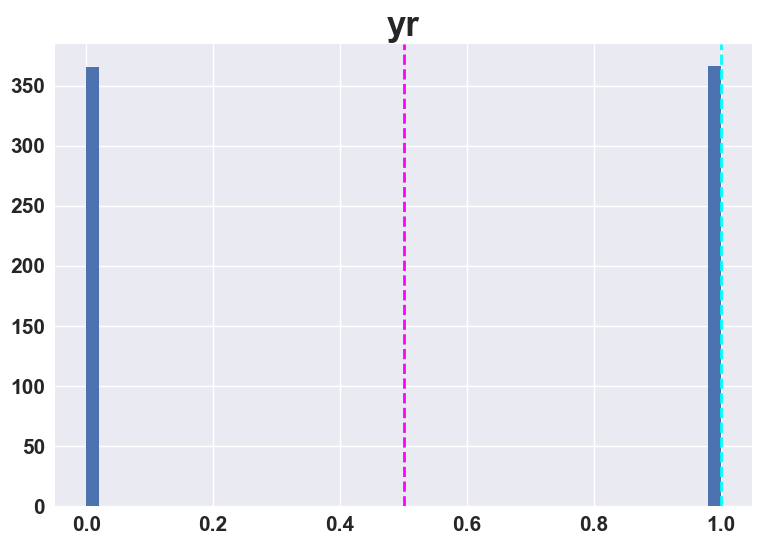

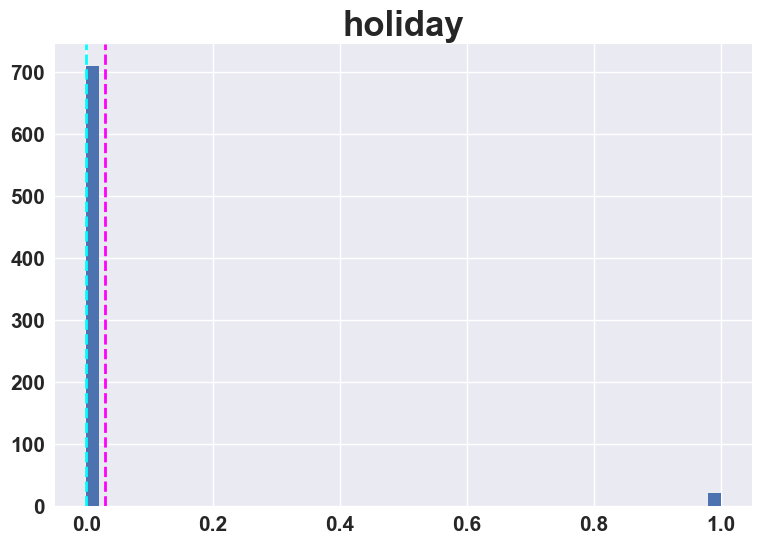

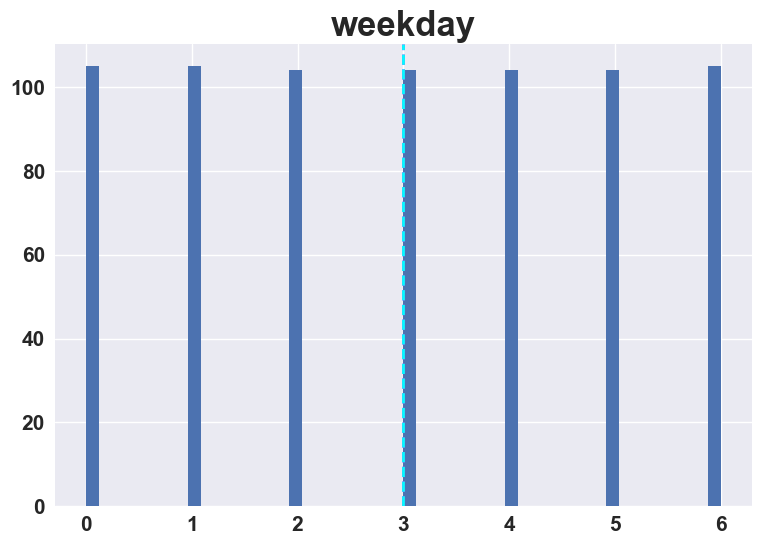

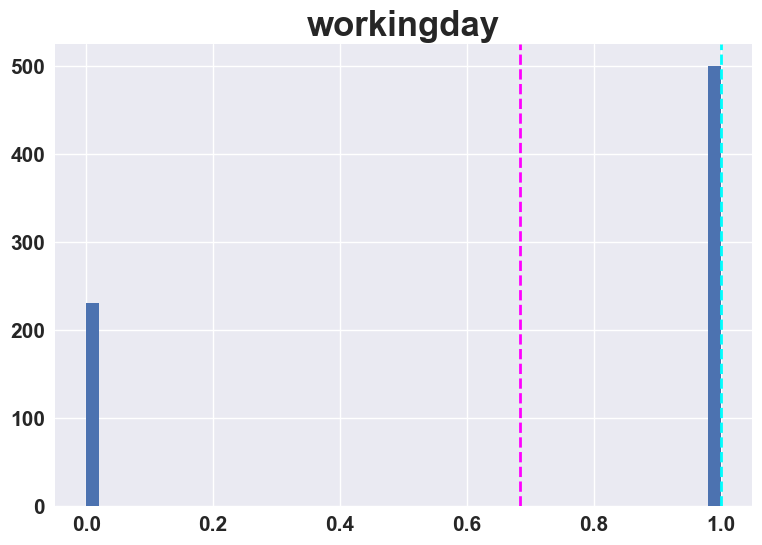

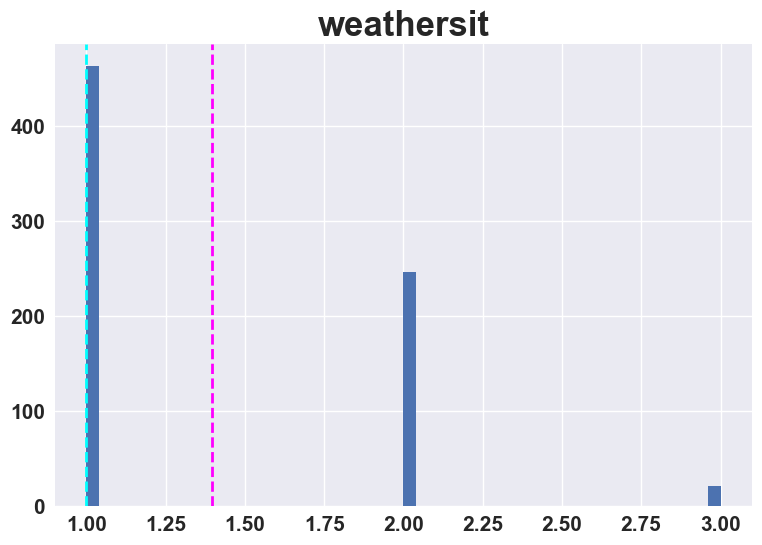

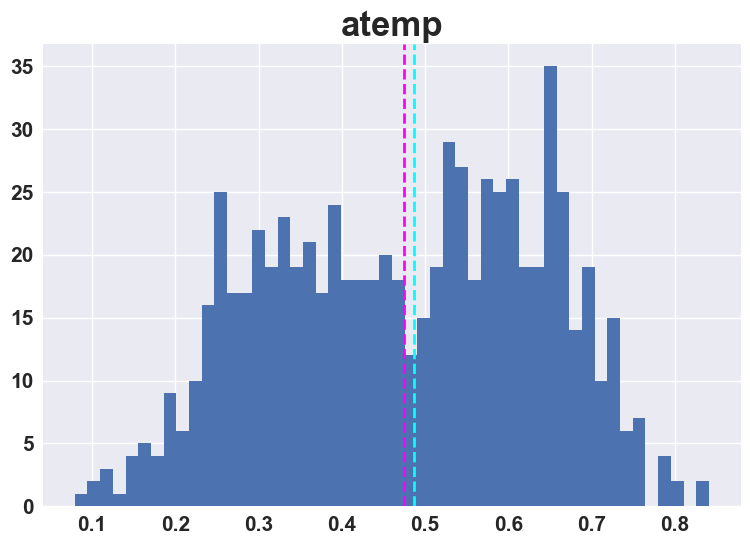

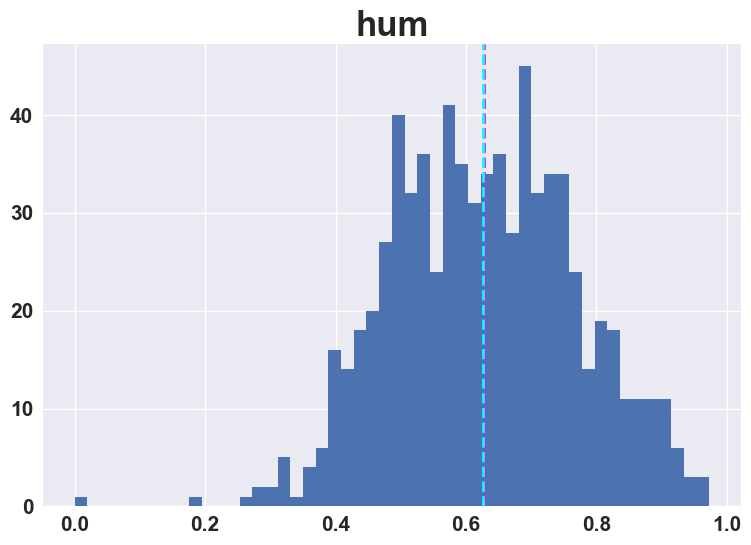

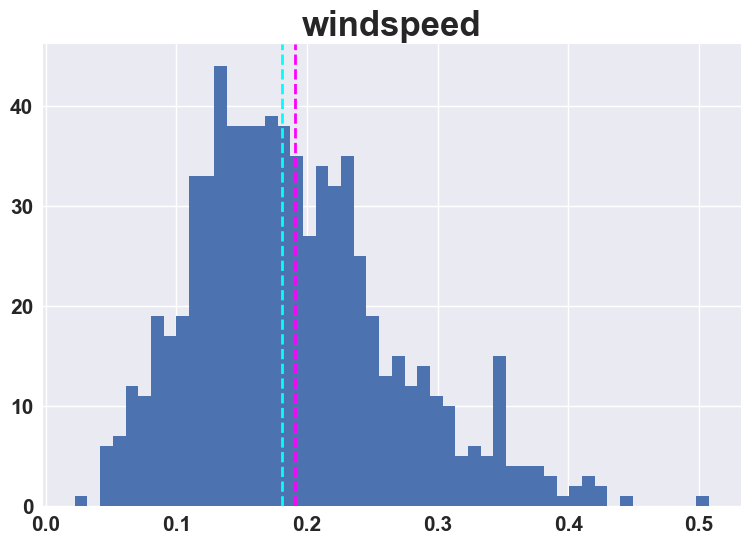

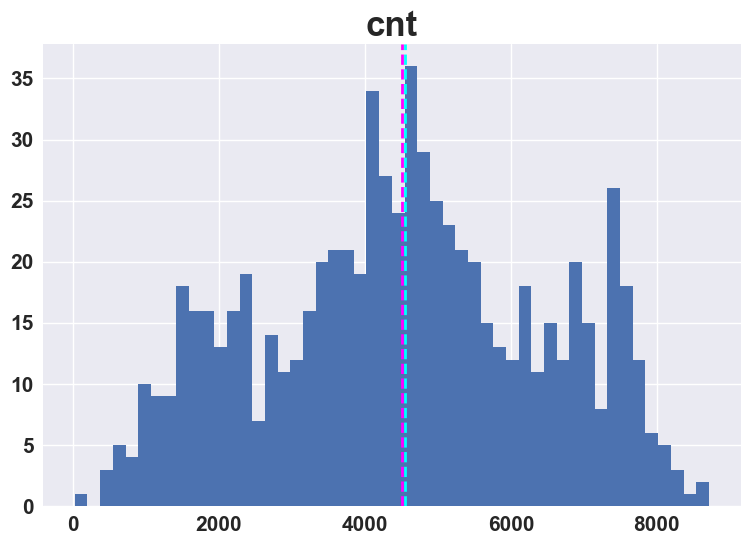

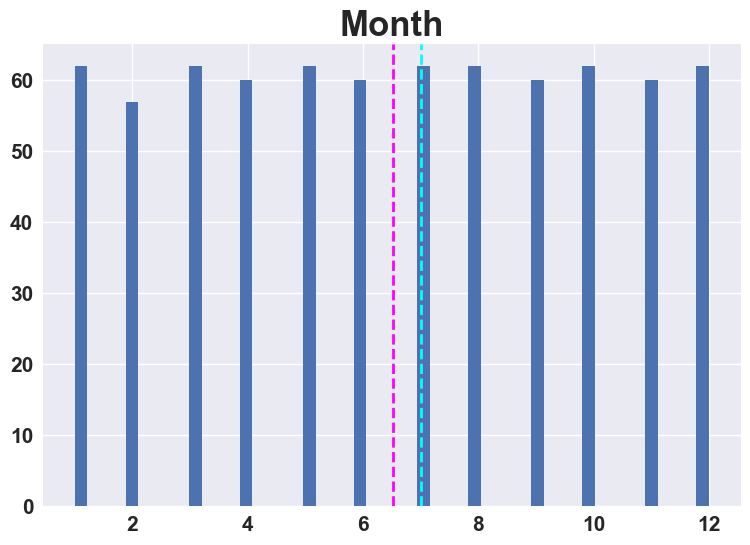

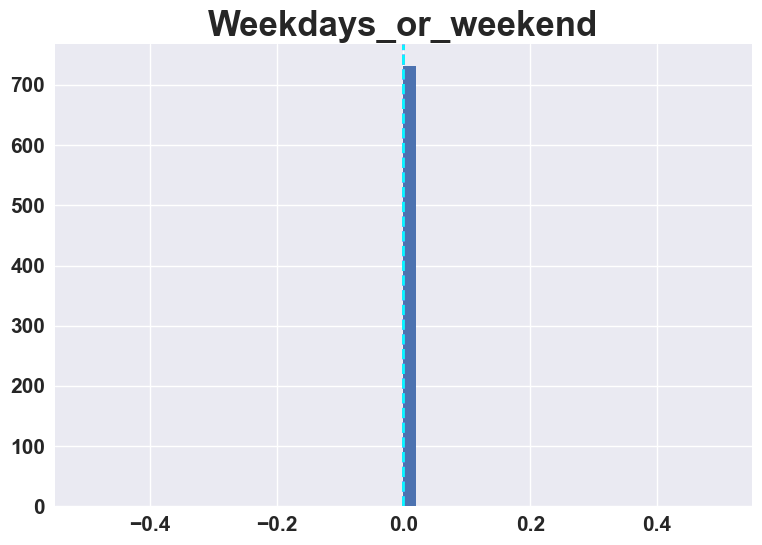

In [35]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = dataset[col]
    feature.hist(bins = 50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    plt.title(col)
plt.show()

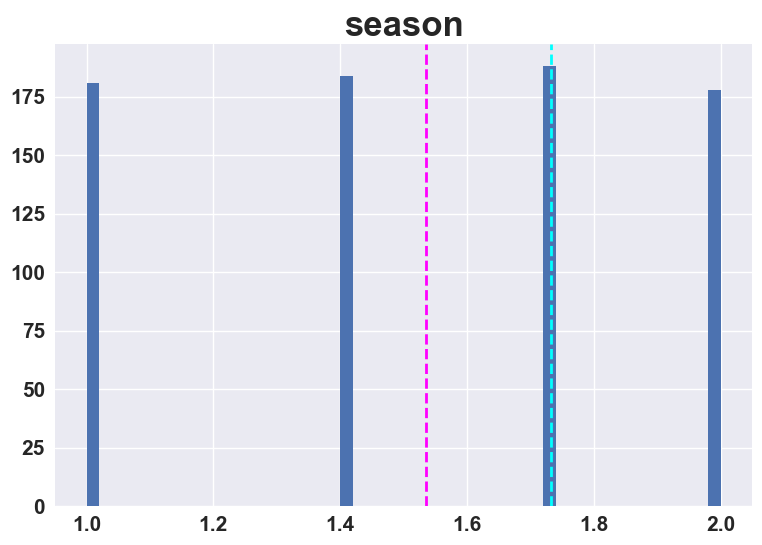

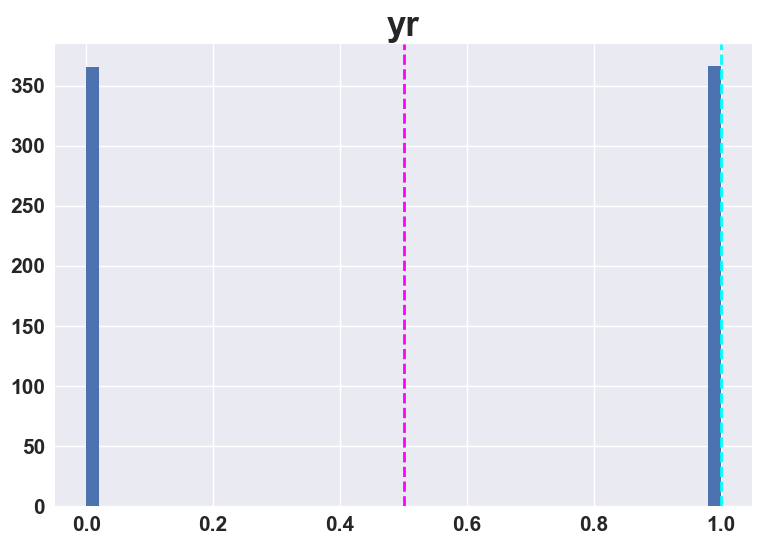

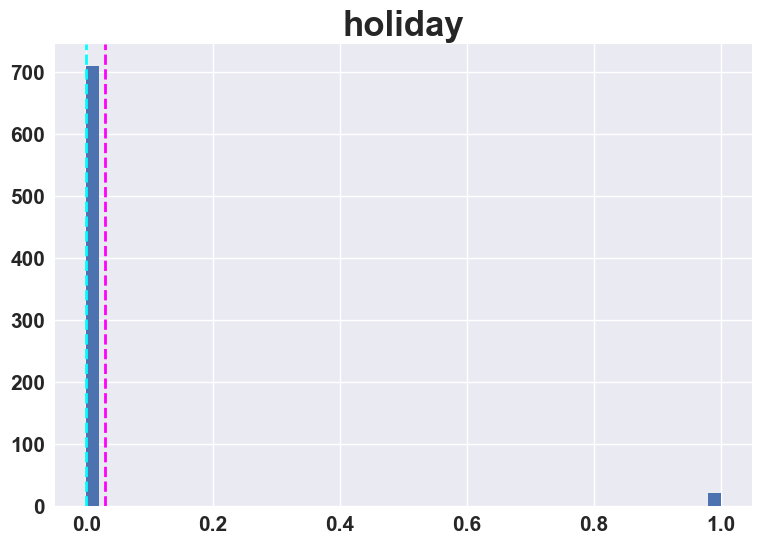

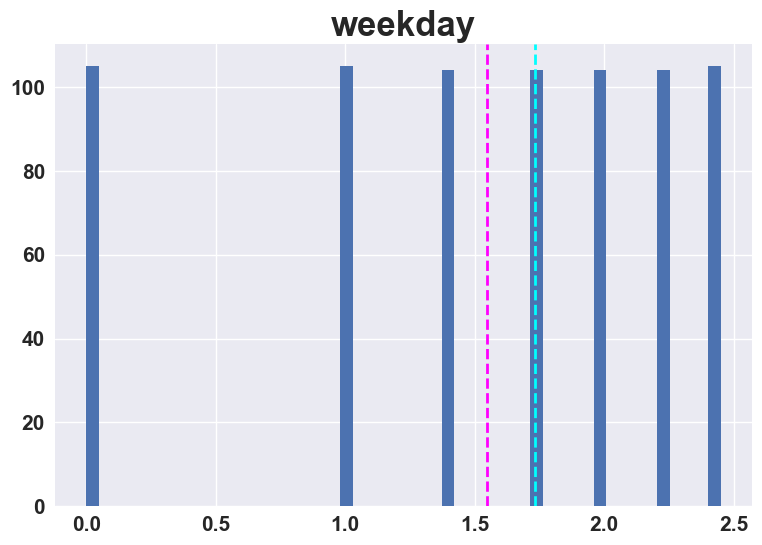

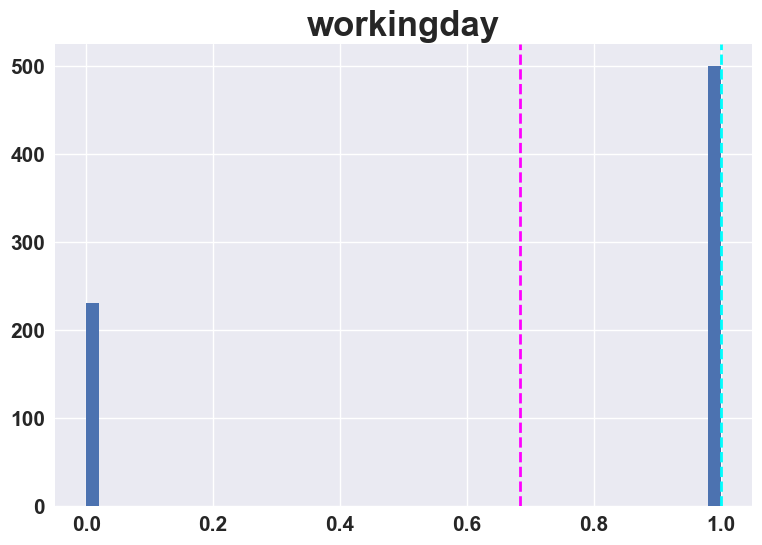

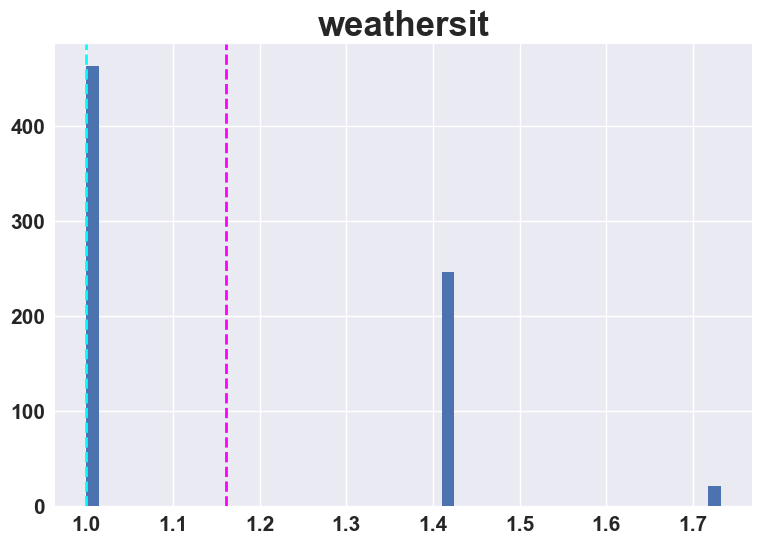

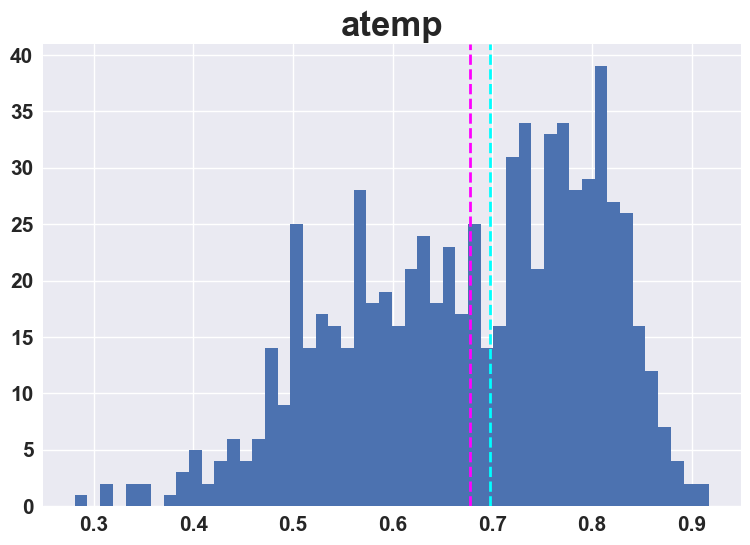

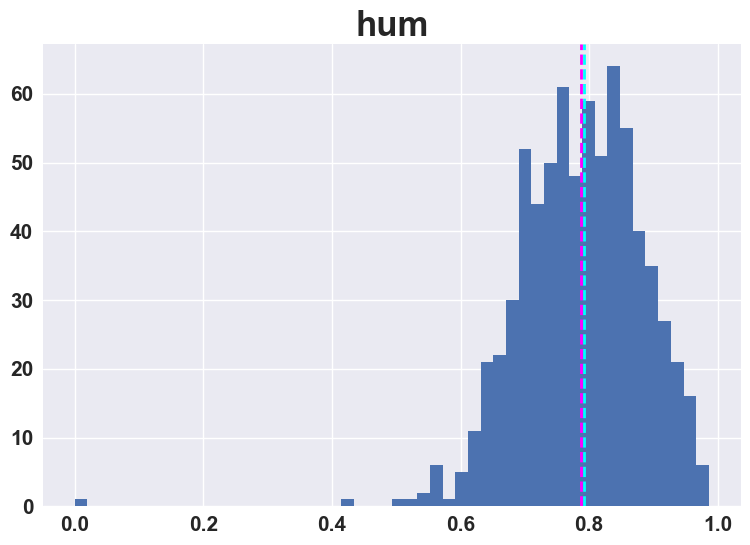

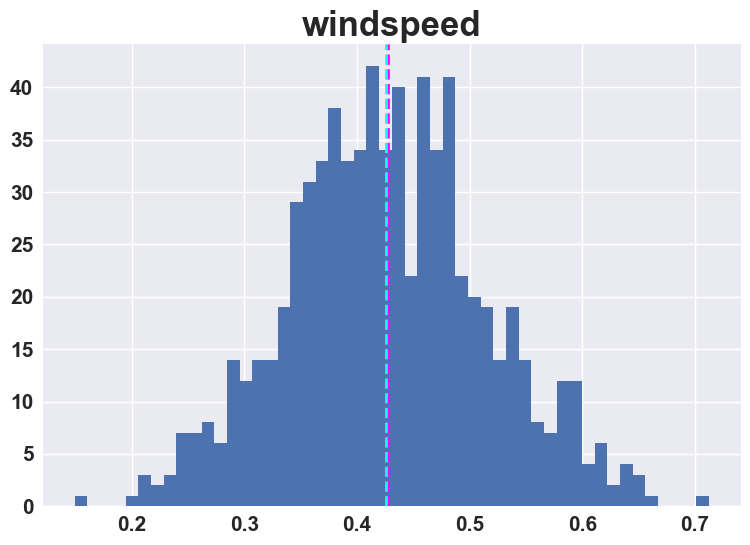

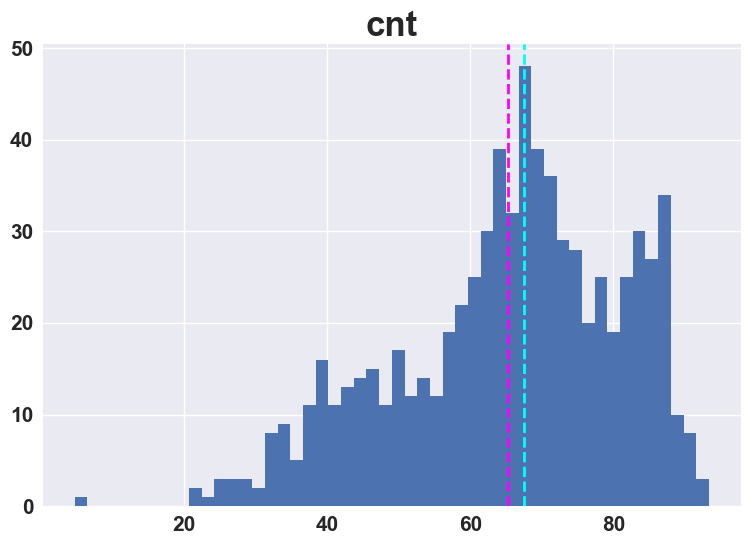

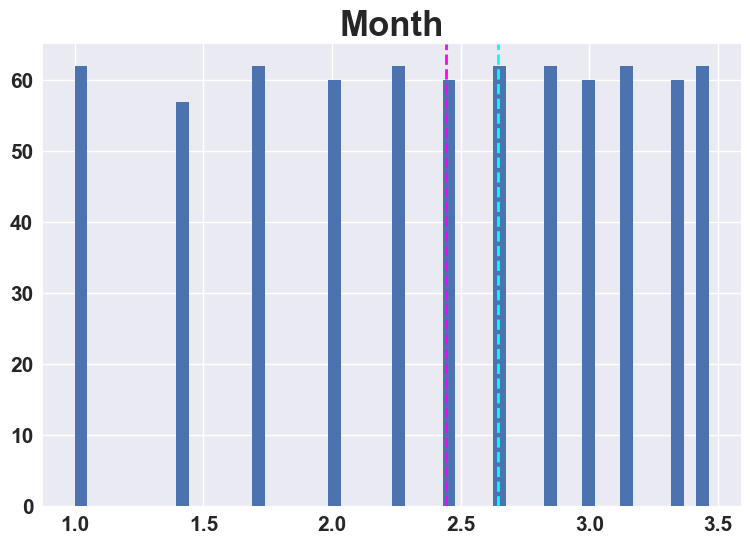

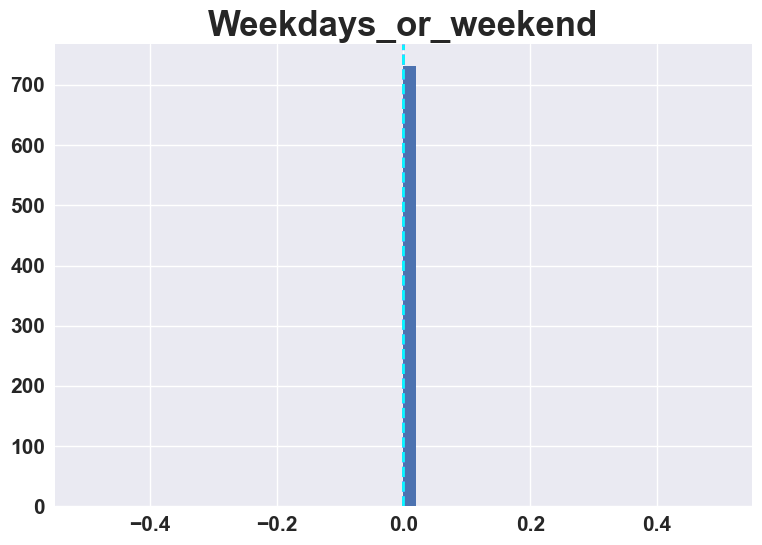

In [36]:
# Normalizing The variables using squre root method.
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = np.sqrt(dataset[col])
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

### Bivariate Analysis

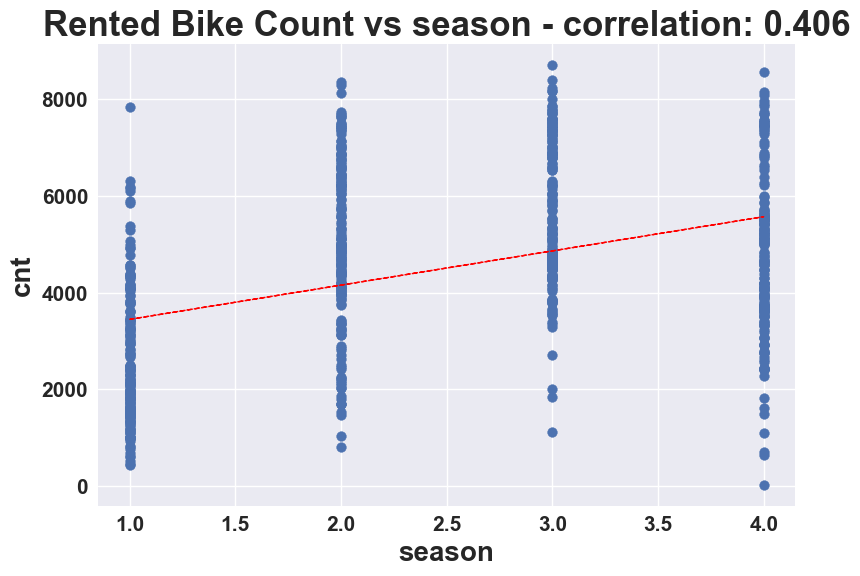

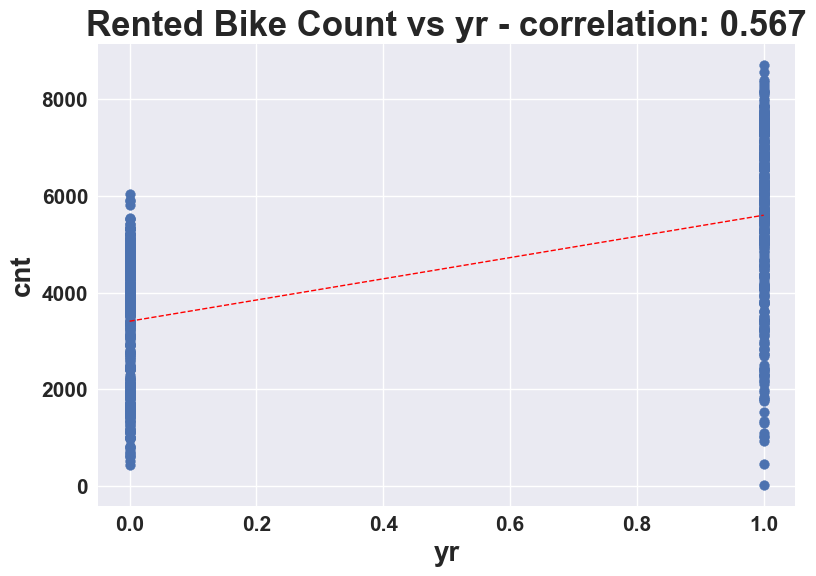

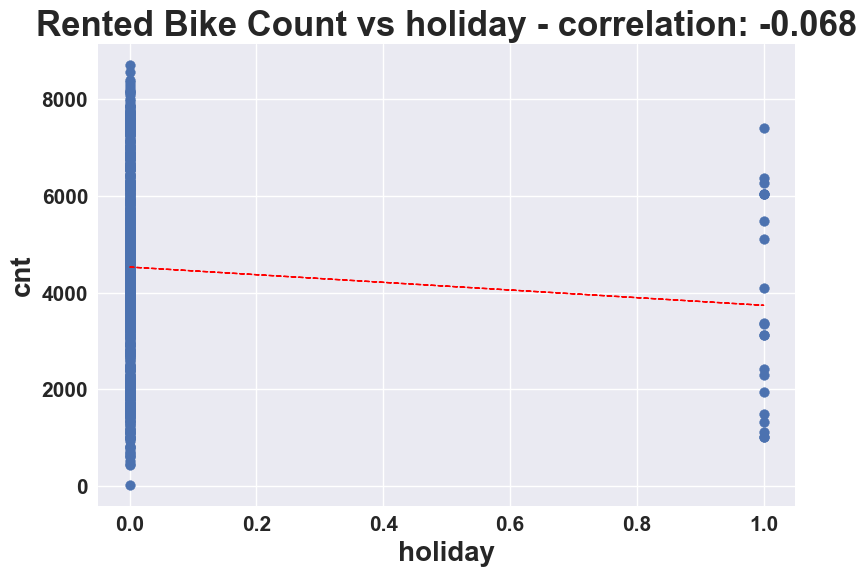

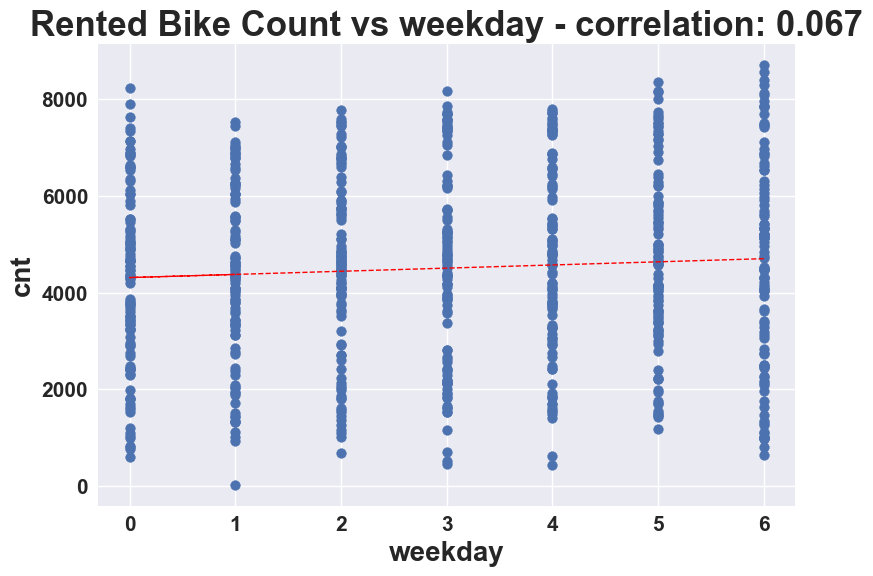

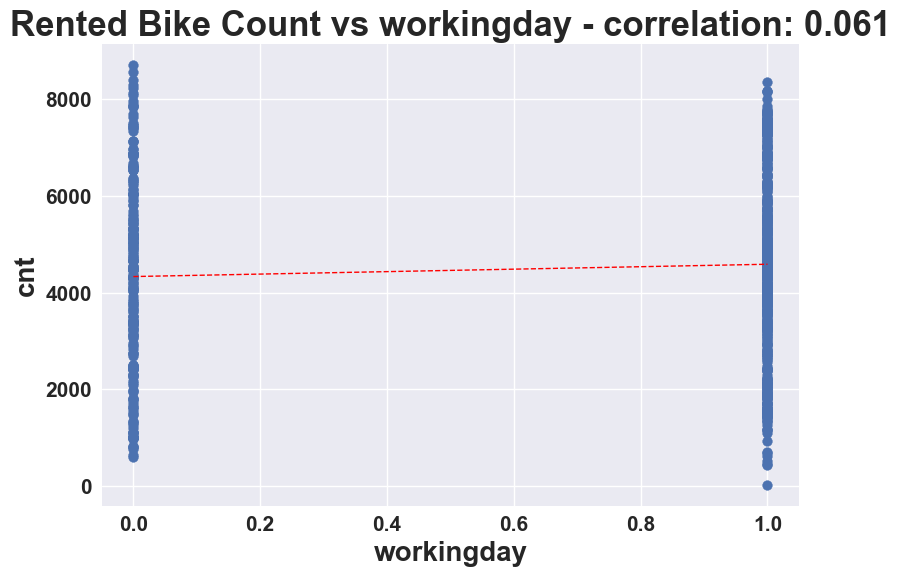

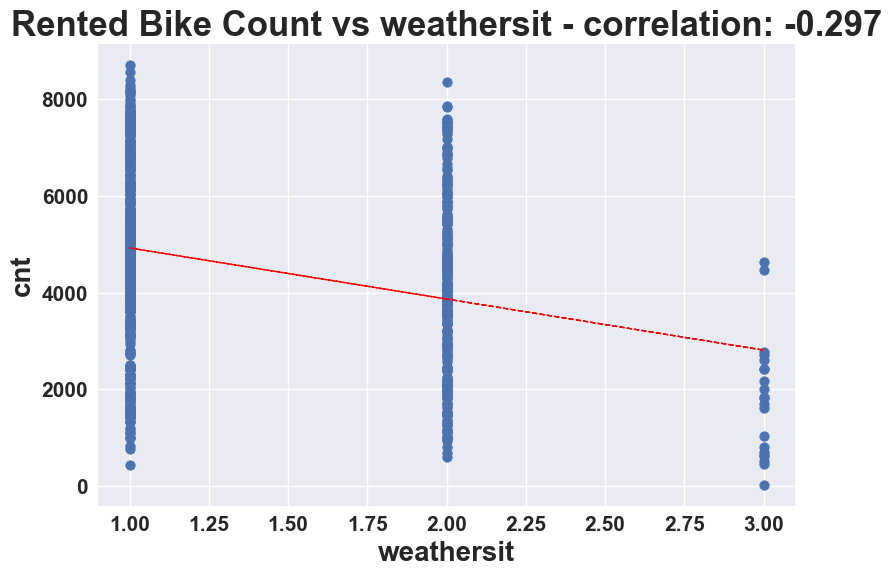

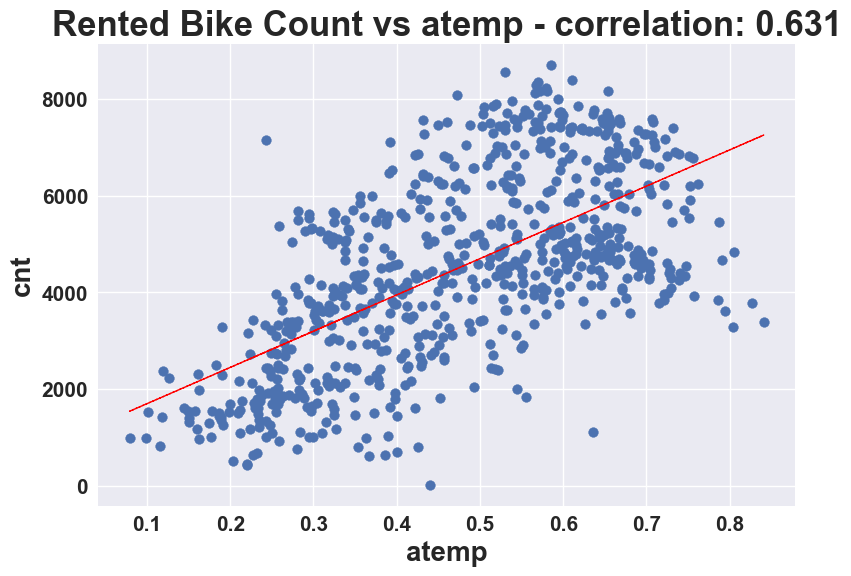

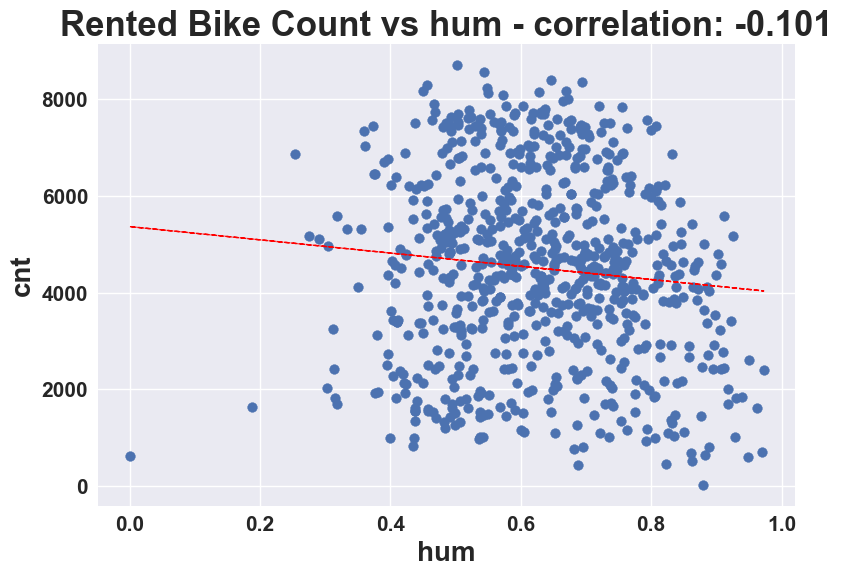

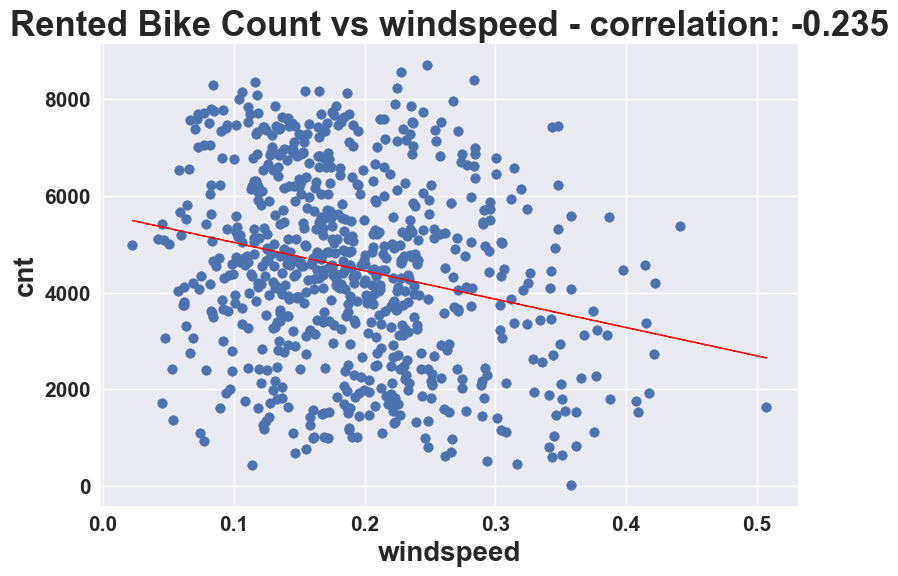

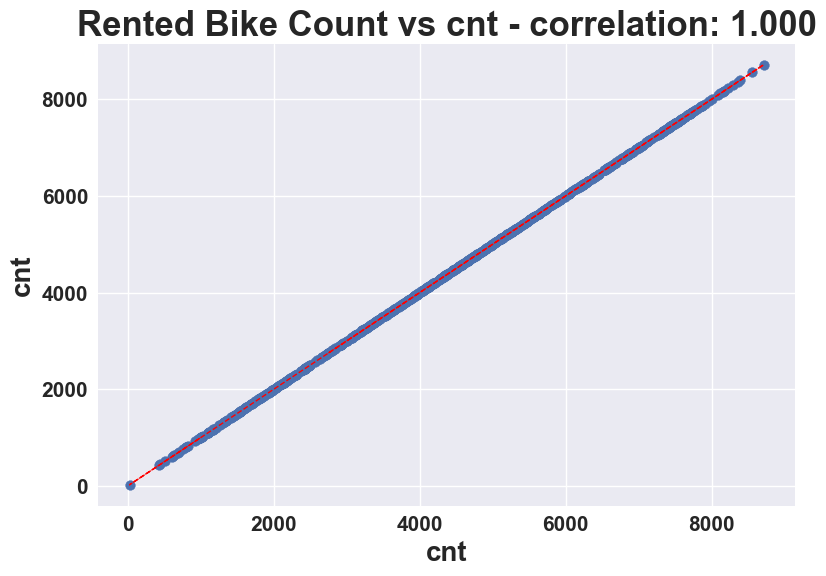

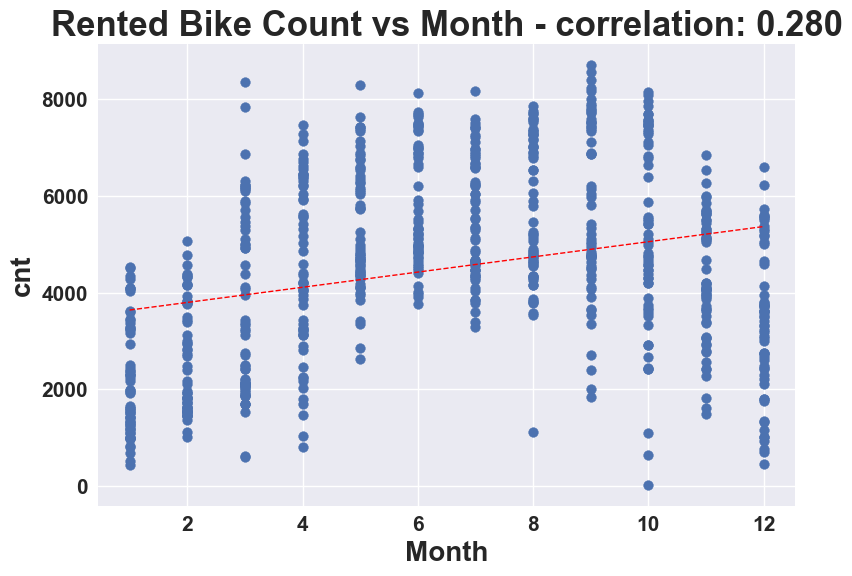

Skipping Weekdays_or_weekend: SVD did not converge.


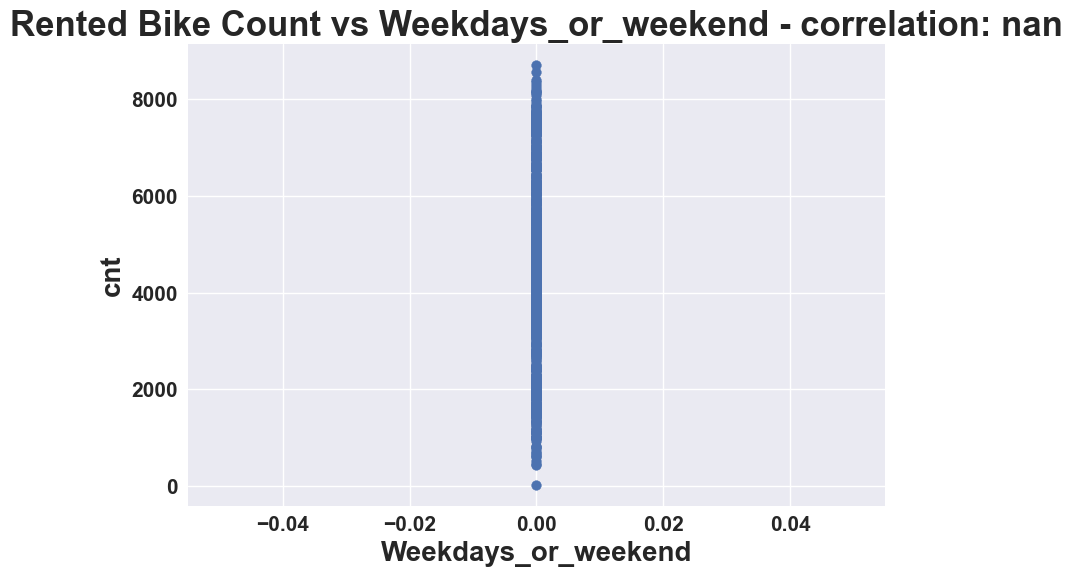

In [37]:
for col in numeric_features:
    feature = dataset[col]
    label = dataset['cnt']

    mask = np.isfinite(feature) & np.isfinite(label)
    feature = feature[mask]
    label = label[mask]

    if len(feature) < 2:
        continue  # skip if not enough points

    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    correlation = feature.corr(label)

    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('cnt')
    ax.set_title(f'Rented Bike Count vs {col} - correlation: {correlation:.3f}')

    try:
        z = np.polyfit(feature, label, 1)
        y_hat = np.poly1d(z)(feature)
        plt.plot(feature, y_hat, "r--", lw=1)
    except np.linalg.LinAlgError:
        print(f"Skipping {col}: SVD did not converge.")

    plt.show()


<Axes: >

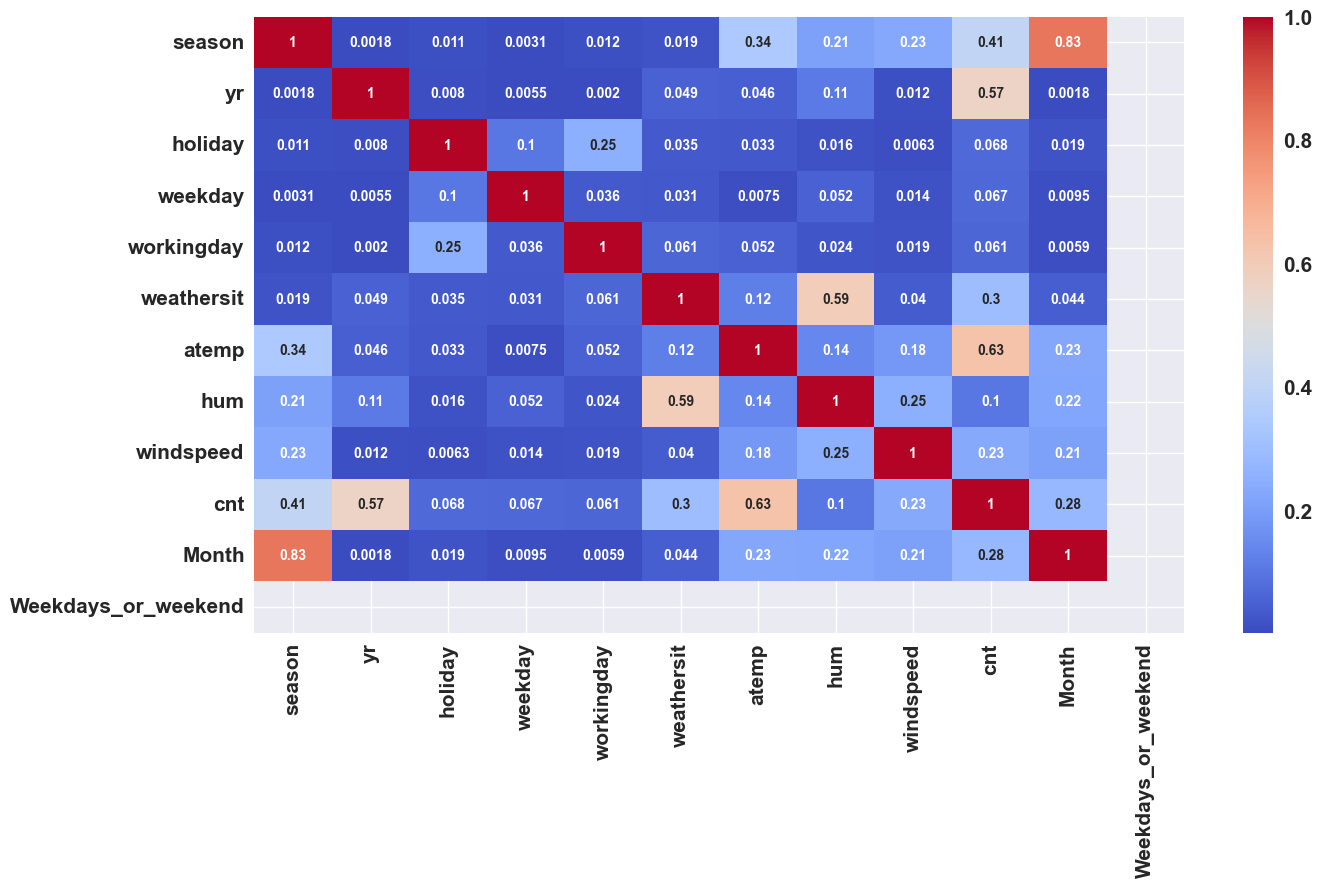

In [38]:
 ## Correlation
plt.figure(figsize=(15,8))
correlation = dataset.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [39]:
# Make copy of dataset
df = dataset.copy()

### Modeling

In [40]:
df.head(1)

,season,yr,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,Month,Weekdays_or_weekend
0,1,0,0,6,0,2,0.363625,0.805833,0.160446,985,1,0


In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

def Calculate_vif(X):
    """
    Calculate Variance Inflation Factor (VIF) for each feature in a DataFrame.
    """
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif


In [42]:
Calculate_vif(df[[i for i in df.describe().columns if i not in ['cnt']]])

,variables,VIF
0,season,21.219408
1,yr,1.950460
2,holiday,1.099279
3,weekday,3.101080
4,workingday,3.271800
5,weathersit,13.134559
6,atemp,10.754528
7,hum,26.481022
8,windspeed,5.296568
9,Month,15.238931


In [43]:
df = df.drop(columns=['Weekdays_or_weekend'])


In [44]:
Calculate_vif(df[[i for i in df.describe().columns if i not in ['cnt']]])

,variables,VIF
0,season,21.219408
1,yr,1.950460
2,holiday,1.099279
3,weekday,3.101080
4,workingday,3.271800
5,weathersit,13.134559
6,atemp,10.754528
7,hum,26.481022
8,windspeed,5.296568
9,Month,15.238931


In [45]:
df['season'].value_counts()

season
3    188
2    184
1    181
4    178
Name: count, dtype: int64

In [46]:
season_dummies = pd.get_dummies(df['season'], prefix='season', drop_first=True)
df = pd.concat([df, season_dummies], axis=1)
df = df.drop(columns=['season','hum'])


In [47]:
Calculate_vif(df[[i for i in df.describe().columns if i not in ['cnt']]])

,variables,VIF
0,yr,1.950304
1,holiday,1.092834
2,weekday,3.089291
3,workingday,3.233892
4,weathersit,6.165842
5,atemp,7.282672
6,windspeed,5.259243
7,Month,4.638525


In [48]:
#standardise continuous features

from sklearn.preprocessing import StandardScaler

num_cols = ['atemp', 'windspeed', 'yr']  # numeric columns in final features
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


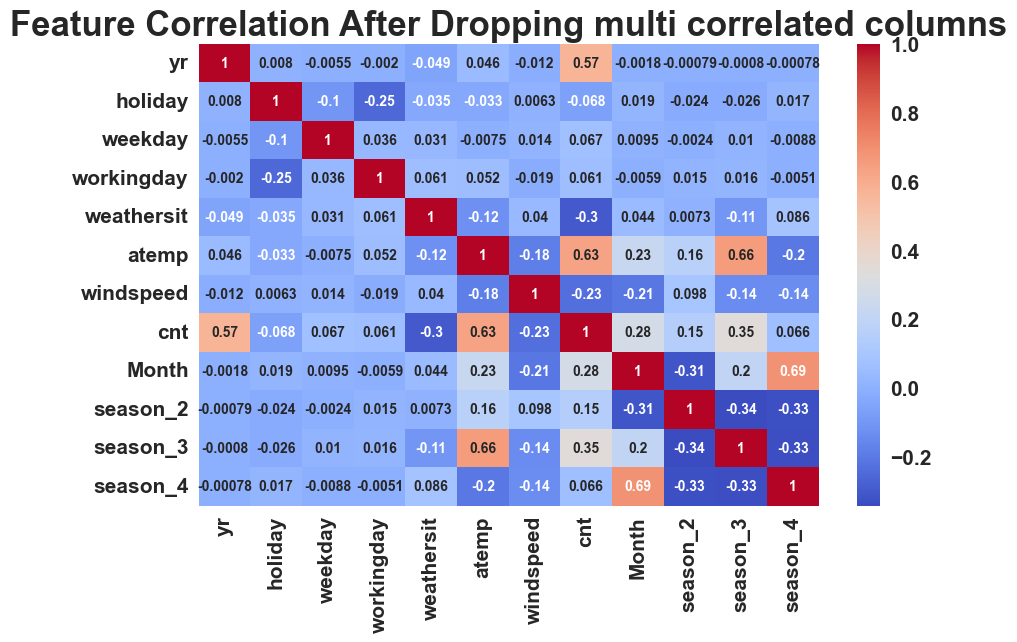

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation After Dropping multi correlated columns")
plt.show()


In [50]:
# Checking categoiries in holiday columns.
df['holiday'].value_counts()

holiday
0    710
1     21
Name: count, dtype: int64

In [51]:
# Checking categoiries in Functioning Day columns.
df['workingday'].value_counts()

workingday
1    500
0    231
Name: count, dtype: int64

In [52]:
df.head()

,yr,holiday,weekday,workingday,weathersit,atemp,windspeed,cnt,Month,season_2,season_3,season_4
0,-1.001369,0,6,0,2,-0.679946,-0.387892,985,1,False,False,False
1,-1.001369,0,0,0,2,-0.740652,0.749602,801,1,False,False,False
2,-1.001369,0,1,1,1,-1.749767,0.746632,1349,1,False,False,False
3,-1.001369,0,2,1,1,-1.610270,-0.389829,1562,1,False,False,False
4,-1.001369,0,3,1,1,-1.504971,-0.046307,1600,1,False,False,False


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          731 non-null    float64
 1   holiday     731 non-null    int64  
 2   weekday     731 non-null    int64  
 3   workingday  731 non-null    int64  
 4   weathersit  731 non-null    int64  
 5   atemp       731 non-null    float64
 6   windspeed   731 non-null    float64
 7   cnt         731 non-null    int64  
 8   Month       731 non-null    int32  
 9   season_2    731 non-null    bool   
 10  season_3    731 non-null    bool   
 11  season_4    731 non-null    bool   
dtypes: bool(3), float64(3), int32(1), int64(5)
memory usage: 50.8 KB


### LINEAR REGRESSION

In [54]:
# lets import train test split for splitting the data
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [55]:
# Creating a dependent variable for rented bike count
dependent_variable = 'cnt'

In [56]:
# Create a list of independent variables
independent_variables = list(set(df.columns.tolist()) - {dependent_variable})
independent_variables

['yr',
 'windspeed',
 'season_3',
 'weekday',
 'weathersit',
 'atemp',
 'season_2',
 'holiday',
 'season_4',
 'Month',
 'workingday']

In [57]:
# Create the dependent variable data
y = np.sqrt(df['cnt'])

# Create the data of independent variables
X = df.drop('cnt',axis=1)

In [58]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [59]:
X_train[0:10]

,yr,holiday,weekday,workingday,weathersit,atemp,windspeed,Month,season_2,season_3,season_4
97,-1.001369,0,5,1,2,-0.920327,0.471378,4,True,False,False
503,0.998633,0,5,1,1,0.471398,-0.692999,5,True,False,False
642,0.998633,0,4,1,2,0.820518,-0.941834,10,False,False,True
498,0.998633,0,0,0,1,0.680898,0.447167,5,True,False,False
303,-1.001369,0,1,1,1,-0.726381,-1.086402,10,False,False,True
570,0.998633,0,2,1,1,1.425216,0.270745,7,False,True,False
250,-1.001369,0,4,1,3,0.497434,0.029205,9,False,True,False
17,-1.001369,0,2,1,2,-1.486162,-0.564417,1,False,False,False
595,0.998633,0,6,0,1,0.882513,-0.162945,8,False,True,False
240,-1.001369,0,1,1,1,0.820413,-0.395910,8,False,True,False


In [60]:
# Transforming data 
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [61]:
# Checking shape
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(584, 11)
(584,)
(147, 11)
(147,)


In [62]:
X_train[0:10]

array([[0.        , 0.        , 0.83333333, 1.        , 0.5       ,
        0.32839414, 0.48605788, 0.27272727, 1.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.83333333, 1.        , 0.        ,
        0.63167472, 0.24873701, 0.36363636, 1.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.66666667, 1.        , 0.5       ,
        0.70775379, 0.19801995, 0.81818182, 0.        , 0.        ,
        1.        ],
       [1.        , 0.        , 0.        , 0.        , 0.        ,
        0.67732832, 0.48112329, 0.36363636, 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.16666667, 1.        , 0.        ,
        0.37065821, 0.16855453, 0.81818182, 0.        , 0.        ,
        1.        ],
       [1.        , 0.        , 0.33333333, 1.        , 0.        ,
        0.83952793, 0.44516526, 0.54545455, 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.66666667, 1.        , 1.

In [63]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [64]:
# Cheeck coefficents
regressor.coef_

array([ 15.41790612,  -3.53472336,   3.24401853,   1.05430198,
       -13.48668507,  33.36247773,  -7.52943418,  -1.16201349,
         9.34228778,   7.82522509,  12.64220949])

In [65]:
pd.DataFrame(regressor.coef_,X.columns, columns=['Coefficient'])

,Coefficient
yr,15.417906
holiday,-3.534723
weekday,3.244019
workingday,1.054302
weathersit,-13.486685
atemp,33.362478
windspeed,-7.529434
Month,-1.162013
season_2,9.342288
season_3,7.825225


In [66]:
# Check intercept
regressor.intercept_

np.float64(36.40606502395039)

In [67]:
# Checking score
regressor.score(X_train,y_train)

0.7956596089631494

In [68]:
# Y peredictions on train data
y_pred_train = regressor.predict(X_train)

# y predictions on test data
y_pred = regressor.predict(X_test)

In [69]:
# Evaluation of test data set

#Calculate Mean Absolute Error.
MAE = mean_absolute_error(y_test,y_pred)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE = mean_squared_error(y_test,y_pred)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE = np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2 = r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

#Calculate adjusted R2 Score
adj_r2 = 1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"Adjusted R2 is {adj_r2}.")

The Mean Absolute Error (MAE) is 4.801416801949937.
The Mean Squred Error(MSE) is 40.22308161947838.
The Root Mean Squared Error(RMSE) is 6.342166949827036.
The R2 Score is 0.8583973946995382.
Adjusted R2 is 0.8468594046380191.


In [70]:
#Saving train data set results in dataframe.
test_dict = {'Model':"Linear Regression",
              'MAE':round(MAE,4),
              'MSE':round(MSE,4),
              'RMSE':round(RMSE,4),
              'R2_score':round(R2,4),
              'Adjusted_R2':round(adj_r2,4)}

In [71]:
# create test_result dataframe
test_results_df = pd.DataFrame(test_dict,index=[0])
test_results_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted_R2
0,Linear Regression,4.8014,40.2231,6.3422,0.8584,0.8469


In [72]:
# define a fucntion to plot predicted y values and actual y values
def plot_Pred_vs_actual(y_pred_test,y_test):
  ''' 
  Visualize predicted values with actual values.
  '''
  plt.figure(figsize=(20,8))
  plt.plot(y_pred_test)
  plt.plot(np.array(y_test))
  plt.legend(["Predicted","Actual"],)
  plt.title("Predicted V/S Actual")
  plt.show()

In [73]:
# define a function to plot scatter plot for y_test and y_actual.
def plot_scatter(y_pred_test,y_test):
  '''
  Plot scatter plot for y_test values and y_test values. To check how close we are to regresson line
  '''
  plt.figure(figsize=(16,5))
  sns.regplot(x = y_test,y = y_pred_test, line_kws={'color':'red'})
  plt.xlabel('Actual')
  plt.ylabel("Predicted")
  plt.title("Actual v/s Predicted")

In [74]:
# Residuals of the regression are normally distributed.(Homoscedasticity refers to whether these residuals are equally distributed).
def Residual_distPlot(y_pred_test,y_test):  
  '''
  Checks the distribution of residals
  '''        
                                                    
  plt.figure(figsize=(10,5))
  sns.distplot(x = y_test-y_pred_test)
  plt.title("Residual Distribution")

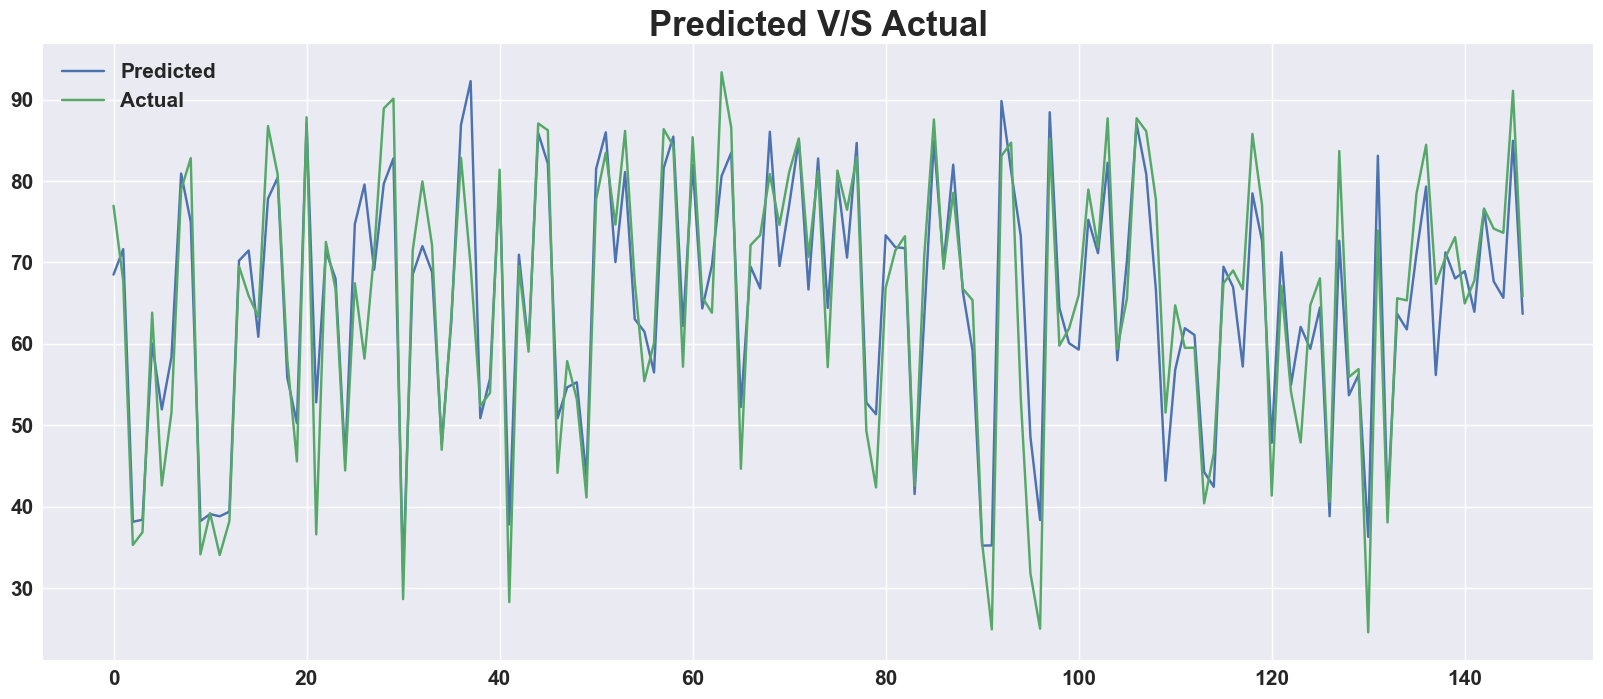

In [75]:
plot_Pred_vs_actual(y_pred,y_test)

Text(0.5, 0, 'y_predicted')

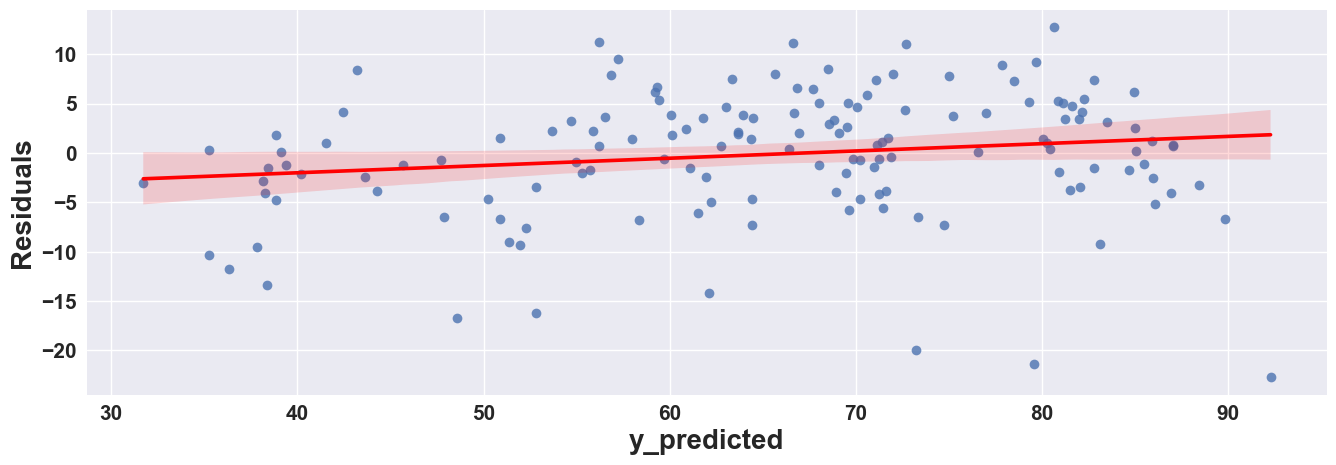

In [76]:
# Check Homoscedasticity by plotting y_predicted values and the residuals
plt.figure(figsize=(16,5))
sns.regplot(x = y_pred, y = y_test-y_pred,line_kws={'color':'red'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

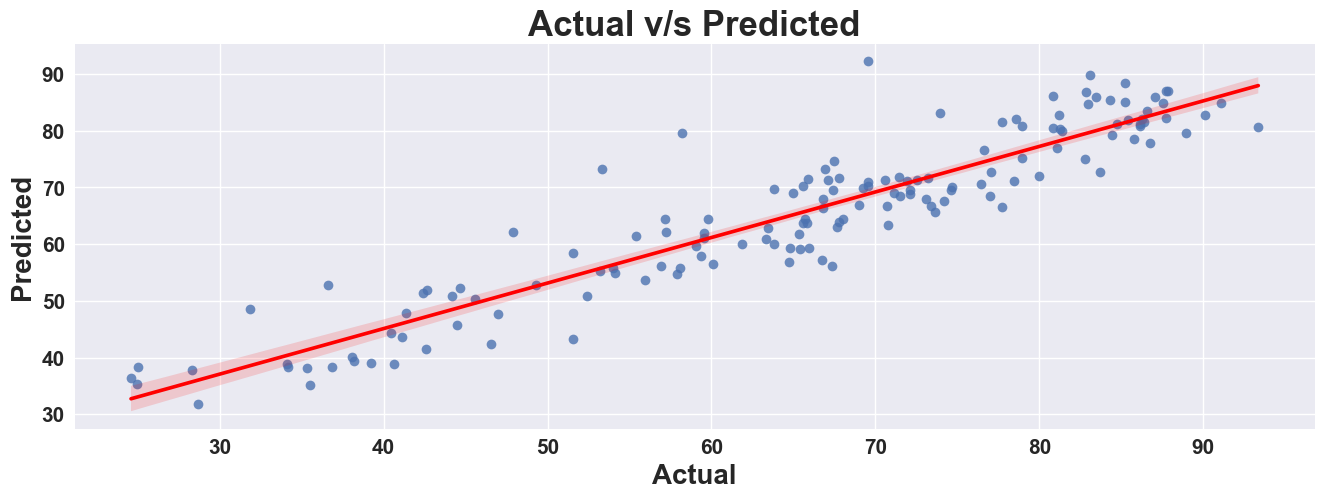

In [77]:
# Checking how predicted values and actual values are close  to the regression line
plot_scatter(y_pred,y_test)

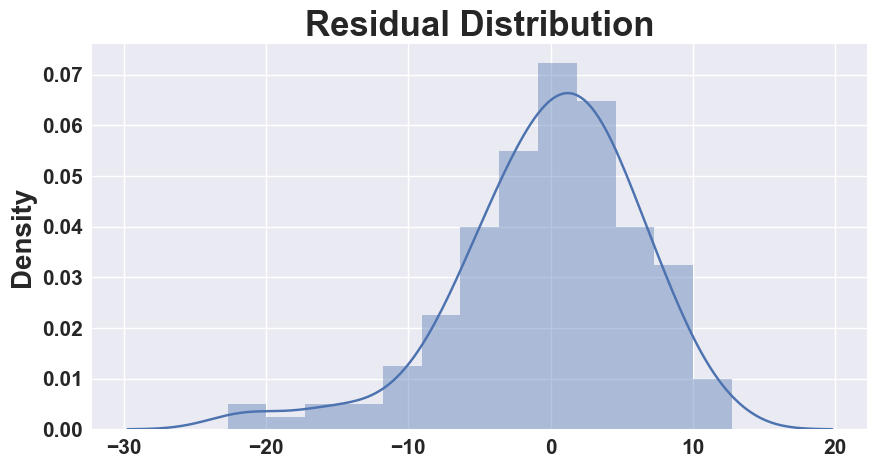

In [78]:
Residual_distPlot(y_pred,y_test)

### LASSO

In [79]:
# Initiating
lasso_reg = Lasso(alpha = 0.01)

In [80]:
# Fitting and training the model
lasso_reg.fit(X_train,y_train)

,alpha,0.01
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [81]:
# Check coefficient
lasso_reg.coef_

array([ 15.38103847,  -3.18283326,   3.14462451,   1.0471254 ,
       -13.35760186,  33.3735352 ,  -7.296749  ,  -0.30887529,
         9.05665583,   7.32830069,  11.88824979])

In [82]:
# get dataframe of x columns and Coeficients
pd.DataFrame(lasso_reg.coef_,X.columns,columns=['Coeficients'])

,Coeficients
yr,15.381038
holiday,-3.182833
weekday,3.144625
workingday,1.047125
weathersit,-13.357602
atemp,33.373535
windspeed,-7.296749
Month,-0.308875
season_2,9.056656
season_3,7.328301


In [83]:
# Check intercept
lasso_reg.intercept_

np.float64(36.30555594461953)

In [84]:
# Checking score
lasso_reg.score(X_train,y_train)

0.7955234521293452

In [85]:
# y prdiction on train data
y_pred_train = lasso_reg.predict(X_train)
# y prdiction on test data
y_pred = lasso_reg.predict(X_test)

In [86]:
# Evaluation of Test data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred)
print(f" The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

#Calculate adjusted R2 Score
adj_r2 = 1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"Adjusted R2 is {adj_r2}.")

 The Mean Absolute Error (MAE) is 4.839129265843794.
 The Mean Squred Error(MSE) is 40.866333259885515.
The Root Mean Squared Error(RMSE) is 6.392678097627434.
The R2 Score is 0.8561328713343931.
Adjusted R2 is 0.8444103645542325.


In [87]:
# Create test results dictionary
test_dict = {'Model':"Lasso",
              'MAE':round(MAE,4),
              'MSE':round(MSE,4),
              'RMSE':round(RMSE,4),
              'R2_score':round(R2,4),
              'Adjusted_R2':round(adj_r2,4)}

In [88]:
# appending test result to test result dataframe
test_results_df = pd.concat([test_results_df, pd.DataFrame([test_dict])], ignore_index=True)
test_results_df


,Model,MAE,MSE,RMSE,R2_score,Adjusted_R2
0,Linear Regression,4.8014,40.2231,6.3422,0.8584,0.8469
1,Lasso,4.8391,40.8663,6.3927,0.8561,0.8444


In [89]:
# cross validation on Lasso regression
# creating object
lasso_rg = Ridge()

# alphas values's dictionary to pass on in Gridsearchcv 
alphas = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}

lasso_linear_reg = GridSearchCV(lasso_rg, alphas, scoring='neg_mean_squared_error', cv=4)
# fitting model
lasso_linear_reg.fit(X_train, y_train)

,estimator,Ridge()
,param_grid,"{'alpha': [1e-15, 1e-13, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,4
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,1


In [90]:
# Since it showing best parameter alpha= 1.. alpha =1 means it will be as linear regression.
print(f'The best alpha value is {lasso_linear_reg.best_params_}')
print(f'The best negative mean squred error value is {lasso_linear_reg.best_score_}')

The best alpha value is {'alpha': 1}
The best negative mean squred error value is -52.74708180193001


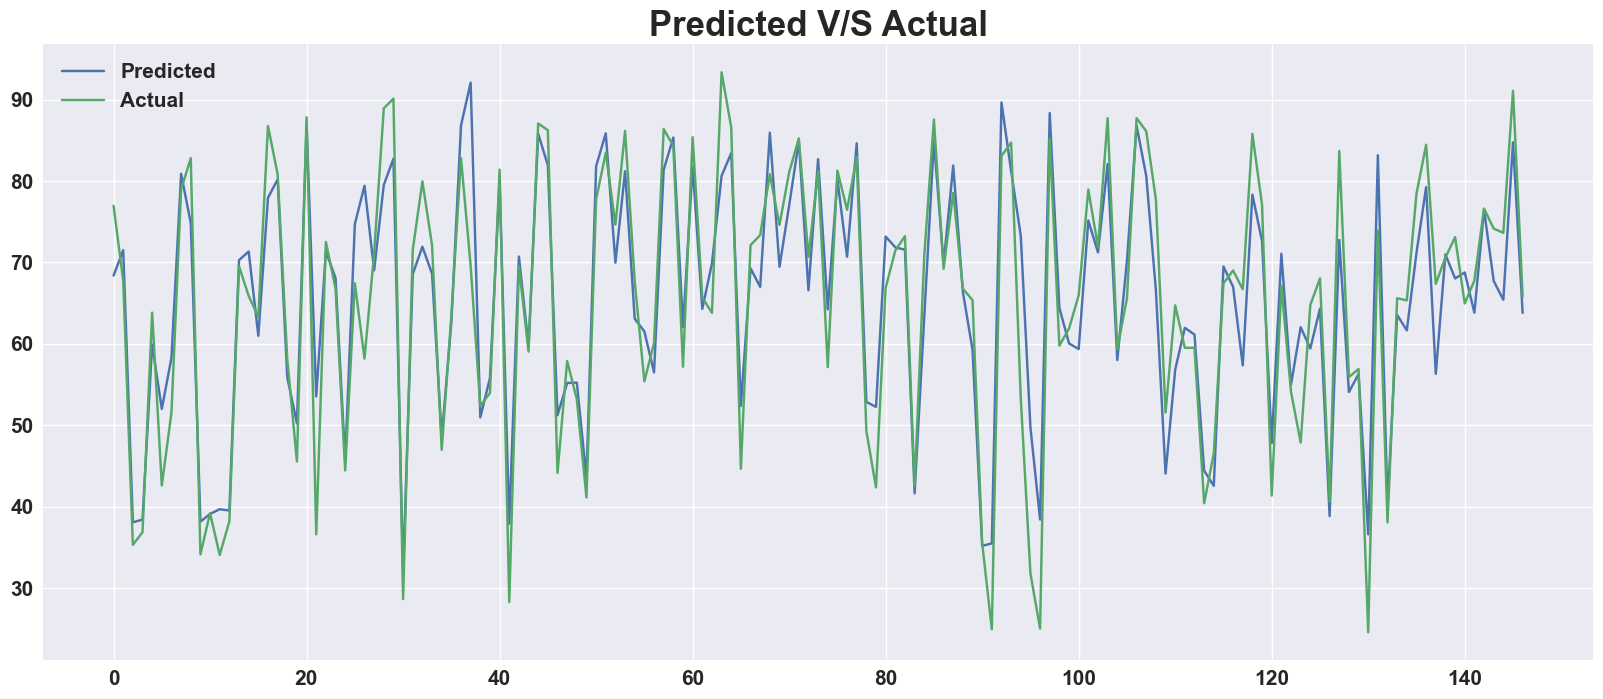

In [91]:
plot_Pred_vs_actual(y_pred,y_test)

Text(0.5, 0, 'y_predicted')

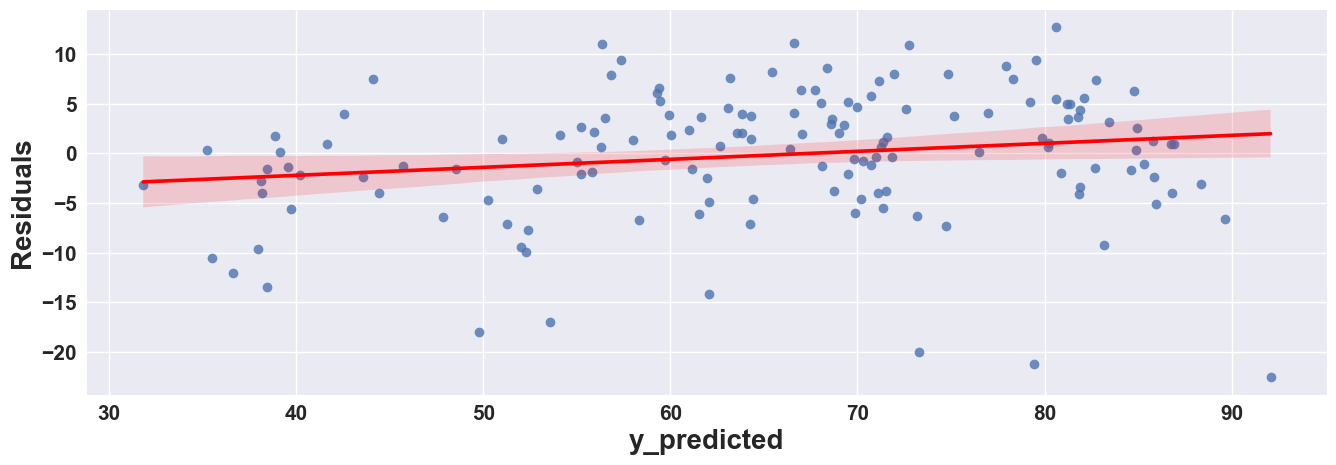

In [92]:
# Check Homoscedasticity by plotting y_predicted values and the residuals
plt.figure(figsize=(16,5))
sns.regplot(x = y_pred,y = y_test-y_pred,line_kws={'color':'red'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

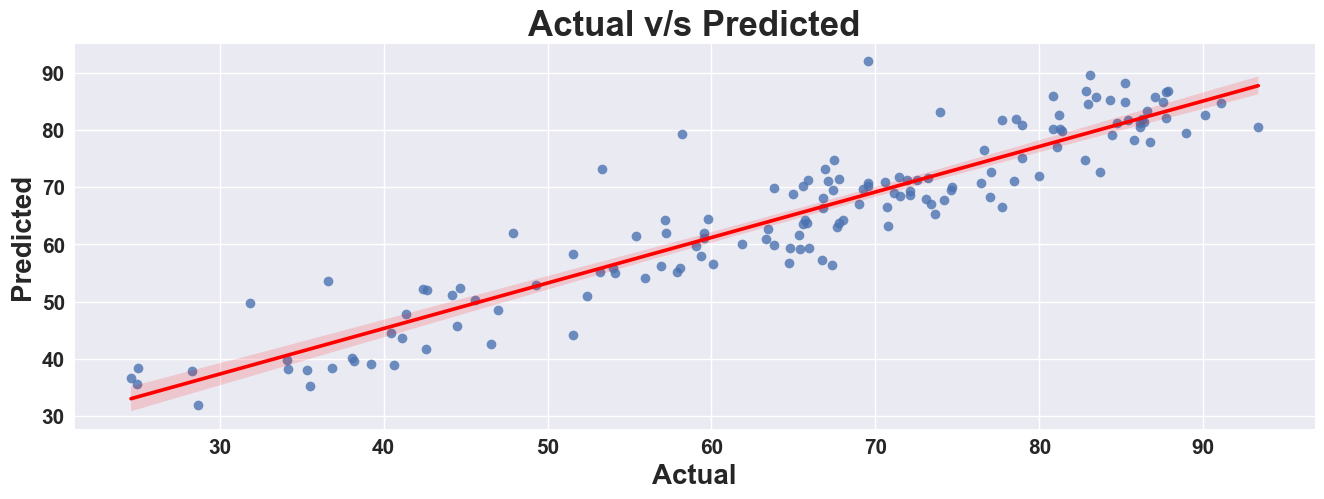

In [93]:
# Checking how predicted values and actual values are close  to the regression line
plot_scatter(y_pred,y_test)

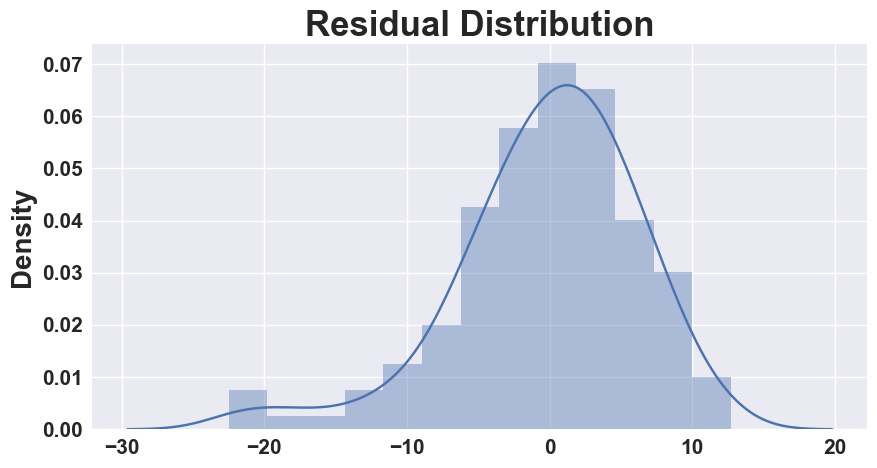

In [94]:
# Residuals of the regression are normally distributed.(Homoscedasticity refers to whether these residuals are equally distributed)
Residual_distPlot(y_pred,y_test)